In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
import numpy as np
import pandas as pd 

In [4]:
import sys
sys.path.append('../../../')

In [5]:
import matplotlib.pyplot as plt 

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [7]:
from src.utils.dates import get_nyse_business_dates

In [8]:
from research.metrics import get_features_responses_correlation
from research.plots import plot_bin_summary_of_xy

In [9]:
from src.settings import Settings

In [10]:
from src.utils.io.read import PreprocessedDataReader

In [11]:
from src.preprocessing.base import FutureTicker

In [12]:
pdr = PreprocessedDataReader(Settings.historical.paths.PREPROCESSED_DATA_PATH)                    

In [13]:
dataset = pdr.read_dataset(ticker=FutureTicker.WTI)

In [14]:
dataset.shape

(813, 81)

In [15]:
dataset.tail(2)

,tradeDate,Name,Commercial_NetPosition,CommercialLongPosition,CommercialShortPosition,ManagedMoney_NetPosition,ManagedMoney_LongPosition,ManagedMoney_ShortPosition,Commercial_NetPosition_change,prior_report_Commercial_NetPosition_change,...,prior_cumulative_5D_F2_Volume_change,next_prior_cumulative_5D_F2_Volume_change,prior_cumulative_5D_F1MinusF2_Volume_change,next_prior_cumulative_5D_F1MinusF2_Volume_change,F1_RolledPrice_change,next_F1_RolledPrice_change,F2_RolledPrice_change,next_F2_RolledPrice_change,F3_RolledPrice_change,next_F3_RolledPrice_change
811,2025-07-22,CL,355309.0,1179861.0,824552.0,208836.0,406472.0,197636.0,-13379.0,31871.0,...,335852.0,-652406.0,-916765.0,1366289.0,0.08,3.9,0.11,3.82,0.18,3.64
812,2025-07-29,CL,362436.0,1172427.0,809991.0,207342.0,411275.0,203933.0,7127.0,-13379.0,...,-652406.0,NaN,1366289.0,NaN,3.90,NaN,3.82,NaN,3.64,NaN


In [16]:
dataset.columns.tolist()

['tradeDate',
 'Name',
 'Commercial_NetPosition',
 'CommercialLongPosition',
 'CommercialShortPosition',
 'ManagedMoney_NetPosition',
 'ManagedMoney_LongPosition',
 'ManagedMoney_ShortPosition',
 'Commercial_NetPosition_change',
 'prior_report_Commercial_NetPosition_change',
 'forward_report_Commercial_NetPosition_change',
 'CommercialLongPosition_change',
 'prior_report_CommercialLongPosition_change',
 'forward_report_CommercialLongPosition_change',
 'CommercialShortPosition_change',
 'prior_report_CommercialShortPosition_change',
 'forward_report_CommercialShortPosition_change',
 'ManagedMoney_NetPosition_change',
 'prior_report_ManagedMoney_NetPosition_change',
 'forward_report_ManagedMoney_NetPosition_change',
 'ManagedMoney_LongPosition_change',
 'prior_report_ManagedMoney_LongPosition_change',
 'forward_report_ManagedMoney_LongPosition_change',
 'ManagedMoney_ShortPosition_change',
 'prior_report_ManagedMoney_ShortPosition_change',
 'forward_report_ManagedMoney_ShortPosition_chan

In [17]:
dataset['Commercial_NetPosition'].describe()

count       813.000000
mean     -11247.533825
std      156021.927084
min     -315658.000000
25%     -146916.000000
50%       13553.000000
75%       95631.000000
max      368688.000000
Name: Commercial_NetPosition, dtype: float64

In [18]:
dataset['ManagedMoney_NetPosition'].describe()

count       813.000000
mean     405093.035670
std      162420.952528
min      100633.000000
25%      273760.000000
50%      366026.000000
75%      518079.000000
max      848584.000000
Name: ManagedMoney_NetPosition, dtype: float64

In [19]:
np.sum(dataset['ManagedMoney_LongPosition'] <= dataset['ManagedMoney_ShortPosition'])

np.int64(0)

In [20]:
dataset['tradeDate'] = pd.to_datetime(dataset['tradeDate']).dt.date

In [21]:
dataset.sort_values(by = 'tradeDate', ascending = True, inplace=True)

In [22]:
dataset.columns.tolist()

['tradeDate',
 'Name',
 'Commercial_NetPosition',
 'CommercialLongPosition',
 'CommercialShortPosition',
 'ManagedMoney_NetPosition',
 'ManagedMoney_LongPosition',
 'ManagedMoney_ShortPosition',
 'Commercial_NetPosition_change',
 'prior_report_Commercial_NetPosition_change',
 'forward_report_Commercial_NetPosition_change',
 'CommercialLongPosition_change',
 'prior_report_CommercialLongPosition_change',
 'forward_report_CommercialLongPosition_change',
 'CommercialShortPosition_change',
 'prior_report_CommercialShortPosition_change',
 'forward_report_CommercialShortPosition_change',
 'ManagedMoney_NetPosition_change',
 'prior_report_ManagedMoney_NetPosition_change',
 'forward_report_ManagedMoney_NetPosition_change',
 'ManagedMoney_LongPosition_change',
 'prior_report_ManagedMoney_LongPosition_change',
 'forward_report_ManagedMoney_LongPosition_change',
 'ManagedMoney_ShortPosition_change',
 'prior_report_ManagedMoney_ShortPosition_change',
 'forward_report_ManagedMoney_ShortPosition_chan

In [23]:
from research.model_selection.CombinatorialPurgedCV import CombinatorialPurgedCV
from research.model_selection.CombinatorialPurgedCV import cpcv_predict



In [24]:

from sklearn.linear_model import LinearRegression, ElasticNetCV
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor


In [25]:
?CombinatorialPurgedCV

Init signature: CombinatorialPurgedCV(n_partitions: int, k: int, purge_amount: int)
Docstring:     
Combinatorial Purged Cross-Validatpr with Purging

This class identifies training and testing indicies that split the data into train/test sets. It also implements purging to avoid lookahead bias.
Init docstring:
Args:
:param n_partitions: the total number of partitions
:param k: the number of partitions to include in the test set
:param purge_amount: the number of indices to be purged between train/test sets
File:           ~/Documents/Projects/omroot_repos/COTAME/research/model_selection/CombinatorialPurgedCV.py
Type:           type
Subclasses:     

In [26]:
response_names =  ['forward_ManagedMoney_NetPosition_to_openinterest_change',
                    'forward_ManagedMoney_LongPosition_to_openinterest_change',
                    'forward_ManagedMoney_ShortPosition_to_openinterest_change'] 



In [27]:
cv = CombinatorialPurgedCV(n_partitions=10,
                           k=2,
                           purge_amount=10)

In [28]:
import json

In [29]:
with open("wti_cot_mm_forecast_selected_features_by_response.json", "r") as f:
    selected_features_by_response = json.load(f)

In [30]:
selected_features_by_response

{'forward_report_ManagedMoney_NetPosition_change': ['prior_report_ManagedMoney_NetPosition_change',
  'prior_report_ManagedMoney_NetPosition_to_openinterest_change',
  'F2_RolledPrice_change',
  'prior_cumulative_5D_F2_Volume_change',
  'prior_5D_F2_OI_change'],
 'forward_report_ManagedMoney_LongPosition_change': ['F2_RolledPrice_change',
  'prior_report_SyntheticF1MinusF2_RolledPrice_change',
  'prior_report_ManagedMoney_ShortPosition_to_openinterest_change'],
 'forward_report_ManagedMoney_ShortPosition_change': ['prior_report_ManagedMoney_LongPosition_change',
  'prior_report_ManagedMoney_NetPosition_to_openinterest_change',
  'F2_RolledPrice_rolling_20D_volatility',
  'F2_RolledPrice_change'],
 'forward_ManagedMoney_NetPosition_to_openinterest_change': ['prior_5D_F1MinusF2_openinterest_change',
  'prior_cumulative_5D_F1MinusF2_Volume_change',
  'prior_cumulative_5D_F2_Volume_change',
  'prior_5D_F2_OI_change'],
 'forward_ManagedMoney_LongPosition_to_openinterest_change': ['prior_cum

In [31]:
from src.preprocessing.base import Winsorizer

In [32]:
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [33]:
from sklearn.linear_model import SGDRegressor, Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor

estimators_  = {
    # Elastic-net via SGD (fast, online)
    "enet": SGDRegressor(
        penalty="elasticnet",
        alpha=1e-4,
        l1_ratio=0.15,
        loss="squared_error",   # or "huber" for robustness
        max_iter=1000,
        tol=1e-3,
        random_state=42
    ),
    # Classic L1 / OLS / L2
    "lasso": Lasso(alpha=1.0, random_state=42),
    "ols": LinearRegression(),
    "ridge": Ridge(alpha=1.0, random_state=42),

    # Tree-based regressors
    "rf": RandomForestRegressor(n_estimators=250, max_depth=10, random_state=42),
    "extra": ExtraTreesRegressor(n_estimators=250, max_depth=10, random_state=42),
    "hgbm": HistGradientBoostingRegressor(max_iter=150, learning_rate=0.001, random_state=42),
}


In [34]:
from __future__ import annotations
import numpy as np
import optuna
from optuna import pruners
from research.model_selection.evaluation import find_best_model

responses_best_model = {}
responses_best_params = {}
responses_study = {}
responses_best_per_model = {}

for (response_name, feature_names) in selected_features_by_response.items():
    best_model, best_params, study, best_per_model = find_best_model(
                        Xy=dataset,
                        feature_names=feature_names,
                        response_name=response_name,
                        cv=cv,
                        n_trials=80,         # bump this as you like
                        n_jobs_cpcv=10,
                        seed=42
                    )
    responses_best_model[response_name]=best_model
    responses_best_params[response_name]=best_params
    responses_study[response_name]=study
    responses_best_per_model[response_name]=best_per_model
    
    print("Overall Best Params:", best_params)
    print("\nBest Per Model:")
    for model, info in best_per_model.items():
        print(f"{model}: score={info['score']:.4f}, params={info['params']}")

[I 2025-08-20 16:08:26,092] A new study created in memory with name: no-name-8c6cf56c-195c-4110-8b89-6e23b135b922
Best trial: 1. Best value: 0.0449593:   1%|      | 1/80 [00:01<01:47,  1.37s/it]

[I 2025-08-20 16:08:27,464] Trial 0 finished with value: 0.04493086144031602 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: 0.04493086144031602.
[I 2025-08-20 16:08:27,496] Trial 1 finished with value: 0.04495928188466212 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.04495928188466212.


Best trial: 2. Best value: 0.134869:   4%|▎      | 3/80 [00:05<02:22,  1.85s/it]

[I 2025-08-20 16:08:31,502] Trial 2 finished with value: 0.13486877923968035 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.13486877923968035.


Best trial: 2. Best value: 0.134869:   9%|▌      | 7/80 [00:05<00:39,  1.84it/s]

[I 2025-08-20 16:08:31,765] Trial 3 finished with value: 0.11634510266022213 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.13486877923968035.
[I 2025-08-20 16:08:31,797] Trial 4 finished with value: 0.04496231477005663 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.13486877923968035.
[I 2025-08-20 16:08:31,825] Trial 5 finished with value: 0.04495927904675879 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.13486877923968035.
[I 2025-08-20 16:08:31,867] Trial 6 finished with value: -0.03230929564677369 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.13486877923968035.
[I 2025-08-20 16:08:31,898] Trial 7 finished with value: 0.04495927904675879

Best trial: 2. Best value: 0.134869:  11%|▊      | 9/80 [00:06<00:28,  2.48it/s]

[I 2025-08-20 16:08:32,183] Trial 8 finished with value: 0.11756852286121144 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.13486877923968035.
[I 2025-08-20 16:08:32,216] Trial 9 finished with value: 0.04495927904675879 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.13486877923968035.


Best trial: 2. Best value: 0.134869:  14%|▊     | 11/80 [00:10<01:07,  1.02it/s]

[I 2025-08-20 16:08:36,358] Trial 10 finished with value: 0.13483057150522018 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.13486877923968035.


Best trial: 2. Best value: 0.134869:  15%|▉     | 12/80 [00:14<01:44,  1.53s/it]

[I 2025-08-20 16:08:40,154] Trial 11 finished with value: 0.13483057150522018 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.13486877923968035.


Best trial: 2. Best value: 0.134869:  16%|▉     | 13/80 [00:17<02:16,  2.03s/it]

[I 2025-08-20 16:08:43,989] Trial 12 finished with value: 0.13483057150522018 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.13486877923968035.


Best trial: 2. Best value: 0.134869:  18%|█     | 14/80 [00:19<02:11,  1.99s/it]

[I 2025-08-20 16:08:45,817] Trial 13 finished with value: 0.12474008098194754 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.13486877923968035.


Best trial: 2. Best value: 0.134869:  19%|█▏    | 15/80 [00:26<03:35,  3.31s/it]

[I 2025-08-20 16:08:53,036] Trial 14 finished with value: 0.13295775974722648 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 2 with value: 0.13486877923968035.


Best trial: 2. Best value: 0.134869:  20%|█▏    | 16/80 [00:28<03:06,  2.91s/it]

[I 2025-08-20 16:08:54,830] Trial 15 finished with value: 0.12499583505803932 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 2 with value: 0.13486877923968035.


Best trial: 16. Best value: 0.135332:  22%|█▏   | 18/80 [00:35<04:02,  3.91s/it]

[I 2025-08-20 16:09:01,387] Trial 16 finished with value: 0.13533165672675543 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 14, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 16 with value: 0.13533165672675543.
[I 2025-08-20 16:09:01,432] Trial 17 finished with value: 0.04655205782997472 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 16 with value: 0.13533165672675543.
[I 2025-08-20 16:09:01,477] Trial 18 finished with value: 0.044682839127683345 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 16 with value: 0.13533165672675543.


Best trial: 16. Best value: 0.135332:  25%|█▎   | 20/80 [00:38<02:22,  2.37s/it]

[I 2025-08-20 16:09:04,555] Trial 19 finished with value: 0.1237507490295587 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 13, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 16 with value: 0.13533165672675543.


Best trial: 20. Best value: 0.138002:  26%|█▎   | 21/80 [00:44<03:09,  3.21s/it]

[I 2025-08-20 16:09:11,041] Trial 20 finished with value: 0.13800165277374488 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 20 with value: 0.13800165277374488.


Best trial: 20. Best value: 0.138002:  28%|█▍   | 22/80 [00:51<03:49,  3.95s/it]

[I 2025-08-20 16:09:17,525] Trial 21 finished with value: 0.13800165277374488 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 20 with value: 0.13800165277374488.


Best trial: 20. Best value: 0.138002:  29%|█▍   | 23/80 [00:57<04:21,  4.58s/it]

[I 2025-08-20 16:09:24,044] Trial 22 finished with value: 0.13730802801677985 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 10, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 20 with value: 0.13800165277374488.


Best trial: 20. Best value: 0.138002:  30%|█▌   | 24/80 [01:03<04:27,  4.78s/it]

[I 2025-08-20 16:09:29,411] Trial 23 finished with value: 0.11074482480900247 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 20 with value: 0.13800165277374488.


Best trial: 24. Best value: 0.140089:  31%|█▌   | 25/80 [01:11<05:11,  5.67s/it]

[I 2025-08-20 16:09:37,460] Trial 24 finished with value: 0.14008854653222044 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 9, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 24 with value: 0.14008854653222044.


Best trial: 25. Best value: 0.140089:  32%|█▋   | 26/80 [01:19<05:41,  6.32s/it]

[I 2025-08-20 16:09:45,485] Trial 25 finished with value: 0.1400885465322205 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 9, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.1400885465322205.


Best trial: 25. Best value: 0.140089:  38%|█▉   | 30/80 [01:27<02:31,  3.02s/it]

[I 2025-08-20 16:09:52,988] Trial 26 finished with value: 0.1356212972070114 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.1400885465322205.
[I 2025-08-20 16:09:53,037] Trial 27 finished with value: -0.01760619819635354 and parameters: {'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}. Best is trial 25 with value: 0.1400885465322205.
[I 2025-08-20 16:09:53,070] Trial 28 finished with value: 0.03806286218226262 and parameters: {'model': 'ridge', 'alpha': 442.5093801422389}. Best is trial 25 with value: 0.1400885465322205.
[I 2025-08-20 16:09:53,106] Trial 29 finished with value: 0.04495926981346841 and parameters: {'model': 'lasso', 'alpha': 0.0007305754446019548}. Best is trial 25 with value: 0.1400885465322205.


Best trial: 25. Best value: 0.140089:  39%|█▉   | 31/80 [01:30<02:32,  3.12s/it]

[I 2025-08-20 16:09:56,597] Trial 30 finished with value: 0.0858399113828412 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 4, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.1400885465322205.


Best trial: 31. Best value: 0.141664:  40%|██   | 32/80 [01:38<03:23,  4.24s/it]

[I 2025-08-20 16:10:04,605] Trial 31 finished with value: 0.14166385842368673 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.14166385842368673.


Best trial: 31. Best value: 0.141664:  41%|██   | 33/80 [01:46<04:02,  5.16s/it]

[I 2025-08-20 16:10:12,583] Trial 32 finished with value: 0.14008854653222044 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 9, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.14166385842368673.


Best trial: 31. Best value: 0.141664:  42%|██▏  | 34/80 [01:54<04:29,  5.86s/it]

[I 2025-08-20 16:10:20,437] Trial 33 finished with value: 0.1400885465322205 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 9, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.14166385842368673.


Best trial: 31. Best value: 0.141664:  44%|██▏  | 35/80 [01:57<03:49,  5.11s/it]

[I 2025-08-20 16:10:23,531] Trial 34 finished with value: 0.11656295761752992 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 9, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 31 with value: 0.14166385842368673.


Best trial: 31. Best value: 0.141664:  46%|██▎  | 37/80 [02:04<04:03,  5.66s/it]

[I 2025-08-20 16:10:30,612] Trial 35 finished with value: 0.12672550217807468 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 5, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.14166385842368673.
[I 2025-08-20 16:10:30,655] Trial 36 finished with value: 0.031624033029791575 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 31 with value: 0.14166385842368673.
[I 2025-08-20 16:10:30,702] Trial 37 finished with value: 0.044959279030703354 and parameters: {'model': 'lasso', 'alpha': 1.261122987665929e-06}. Best is trial 31 with value: 0.14166385842368673.


Best trial: 31. Best value: 0.141664:  49%|██▍  | 39/80 [02:11<02:36,  3.83s/it]

[I 2025-08-20 16:10:37,488] Trial 38 finished with value: 0.13436131267302143 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 6, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.14166385842368673.


Best trial: 31. Best value: 0.141664:  50%|██▌  | 40/80 [02:14<02:23,  3.59s/it]

[I 2025-08-20 16:10:40,146] Trial 39 finished with value: 0.10999292851527409 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 8, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 31 with value: 0.14166385842368673.
[I 2025-08-20 16:10:40,200] Trial 40 finished with value: 0.04495927904675879 and parameters: {'model': 'ols'}. Best is trial 31 with value: 0.14166385842368673.


Best trial: 31. Best value: 0.141664:  52%|██▋  | 42/80 [02:22<02:25,  3.83s/it]

[I 2025-08-20 16:10:48,664] Trial 41 finished with value: 0.13922545118868696 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 11, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.14166385842368673.


Best trial: 42. Best value: 0.141713:  54%|██▋  | 43/80 [02:30<02:52,  4.67s/it]

[I 2025-08-20 16:10:56,480] Trial 42 finished with value: 0.14171271478883568 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 9, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 42 with value: 0.14171271478883568.


Best trial: 42. Best value: 0.141713:  55%|██▊  | 44/80 [02:38<03:19,  5.54s/it]

[I 2025-08-20 16:11:04,919] Trial 43 finished with value: 0.14042142709442687 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 12, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 42 with value: 0.14171271478883568.


Best trial: 42. Best value: 0.141713:  56%|██▊  | 45/80 [02:44<03:13,  5.53s/it]

[I 2025-08-20 16:11:10,438] Trial 44 finished with value: 0.14075872201307774 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 12, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 42 with value: 0.14171271478883568.


Best trial: 42. Best value: 0.141713:  59%|██▉  | 47/80 [02:49<03:02,  5.52s/it]

[I 2025-08-20 16:11:15,918] Trial 45 finished with value: 0.14075872201307774 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 12, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 42 with value: 0.14171271478883568.
[I 2025-08-20 16:11:15,952] Trial 46 finished with value: 0.045447369858669165 and parameters: {'model': 'ridge', 'alpha': 10.98513769813624}. Best is trial 42 with value: 0.14171271478883568.
[I 2025-08-20 16:11:15,980] Trial 47 finished with value: 0.04495927904675879 and parameters: {'model': 'ols'}. Best is trial 42 with value: 0.14171271478883568.


Best trial: 42. Best value: 0.141713:  61%|███  | 49/80 [02:55<01:51,  3.61s/it]

[I 2025-08-20 16:11:21,635] Trial 48 finished with value: 0.14075872201307774 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 12, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 42 with value: 0.14171271478883568.
[I 2025-08-20 16:11:21,679] Trial 49 finished with value: 0.04655205611560407 and parameters: {'model': 'enet', 'alpha': 1.3193358601008069e-05, 'l1_ratio': 0.9740839602637289, 'loss': 'squared_error'}. Best is trial 42 with value: 0.14171271478883568.


Best trial: 42. Best value: 0.141713:  64%|███▏ | 51/80 [03:01<01:37,  3.37s/it]

[I 2025-08-20 16:11:27,392] Trial 50 finished with value: 0.1390962731103807 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 42 with value: 0.14171271478883568.


Best trial: 42. Best value: 0.141713:  65%|███▎ | 52/80 [03:07<01:47,  3.84s/it]

[I 2025-08-20 16:11:33,193] Trial 51 finished with value: 0.13994061217025713 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 16, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 42 with value: 0.14171271478883568.


Best trial: 42. Best value: 0.141713:  66%|███▎ | 53/80 [03:12<01:55,  4.27s/it]

[I 2025-08-20 16:11:39,058] Trial 52 finished with value: 0.14075872201307774 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 12, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 42 with value: 0.14171271478883568.


Best trial: 42. Best value: 0.141713:  68%|███▍ | 54/80 [03:18<01:59,  4.58s/it]

[I 2025-08-20 16:11:44,619] Trial 53 finished with value: 0.1380672256516668 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 13, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 42 with value: 0.14171271478883568.


Best trial: 42. Best value: 0.141713:  69%|███▍ | 55/80 [03:24<02:03,  4.95s/it]

[I 2025-08-20 16:11:50,691] Trial 54 finished with value: 0.13987954726468096 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 15, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 42 with value: 0.14171271478883568.


Best trial: 42. Best value: 0.141713:  70%|███▌ | 56/80 [03:27<01:45,  4.38s/it]

[I 2025-08-20 16:11:53,460] Trial 55 finished with value: 0.1392944455509105 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 12, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 42 with value: 0.14171271478883568.


Best trial: 42. Best value: 0.141713:  71%|███▌ | 57/80 [03:29<01:29,  3.89s/it]

[I 2025-08-20 16:11:56,072] Trial 56 finished with value: 0.1268905434960044 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 16, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 42 with value: 0.14171271478883568.


Best trial: 42. Best value: 0.141713:  72%|███▋ | 58/80 [03:31<01:11,  3.25s/it]

[I 2025-08-20 16:11:57,678] Trial 57 finished with value: 0.11401450079571288 and parameters: {'model': 'hgbm', 'learning_rate': 0.006419588568815613, 'max_depth': 12, 'max_iter': 400, 'l2_regularization': 0.584457419124367, 'max_leaf_nodes': 255}. Best is trial 42 with value: 0.14171271478883568.


Best trial: 42. Best value: 0.141713:  74%|███▋ | 59/80 [03:37<01:27,  4.15s/it]

[I 2025-08-20 16:12:04,076] Trial 58 finished with value: 0.1309166028932668 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 18, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 42 with value: 0.14171271478883568.


Best trial: 42. Best value: 0.141713:  75%|███▊ | 60/80 [03:42<01:23,  4.16s/it]

[I 2025-08-20 16:12:08,260] Trial 59 finished with value: 0.13893138109790795 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 14, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 42 with value: 0.14171271478883568.
[I 2025-08-20 16:12:08,304] Trial 60 finished with value: 0.04495926066809676 and parameters: {'model': 'lasso', 'alpha': 0.0014523663772718597}. Best is trial 42 with value: 0.14171271478883568.


Best trial: 42. Best value: 0.141713:  78%|███▉ | 62/80 [03:48<01:04,  3.61s/it]

[I 2025-08-20 16:12:14,134] Trial 61 finished with value: 0.14075872201307774 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 12, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 42 with value: 0.14171271478883568.


Best trial: 62. Best value: 0.143313:  79%|███▉ | 63/80 [03:53<01:09,  4.11s/it]

[I 2025-08-20 16:12:19,783] Trial 62 finished with value: 0.14331319939408088 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 11, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 62 with value: 0.14331319939408088.


Best trial: 62. Best value: 0.143313:  80%|████ | 64/80 [03:58<01:09,  4.37s/it]

[I 2025-08-20 16:12:24,895] Trial 63 finished with value: 0.13811399189305137 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 62 with value: 0.14331319939408088.


Best trial: 62. Best value: 0.143313:  81%|████ | 65/80 [04:02<01:04,  4.30s/it]

[I 2025-08-20 16:12:29,012] Trial 64 finished with value: 0.14098103767418094 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 10, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 62 with value: 0.14331319939408088.


Best trial: 62. Best value: 0.143313:  82%|████▏| 66/80 [04:05<00:54,  3.92s/it]

[I 2025-08-20 16:12:31,943] Trial 65 finished with value: 0.14030560377515383 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 10, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 62 with value: 0.14331319939408088.
[I 2025-08-20 16:12:31,982] Trial 66 finished with value: -0.017629979035747527 and parameters: {'model': 'enet', 'alpha': 1.6076940573641786e-05, 'l1_ratio': 0.5482949472576926, 'loss': 'huber', 'epsilon': 0.15537787171390066}. Best is trial 62 with value: 0.14331319939408088.


Best trial: 62. Best value: 0.143313:  85%|████▎| 68/80 [04:10<00:37,  3.15s/it]

[I 2025-08-20 16:12:36,333] Trial 67 finished with value: 0.13796996322082428 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 21, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 62 with value: 0.14331319939408088.
[I 2025-08-20 16:12:36,375] Trial 68 finished with value: 0.04495927904675879 and parameters: {'model': 'ols'}. Best is trial 62 with value: 0.14331319939408088.


Best trial: 62. Best value: 0.143313:  88%|████▍| 70/80 [04:13<00:25,  2.52s/it]

[I 2025-08-20 16:12:39,359] Trial 69 finished with value: 0.14135457776414312 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 62 with value: 0.14331319939408088.


Best trial: 62. Best value: 0.143313:  89%|████▍| 71/80 [04:14<00:20,  2.24s/it]

[I 2025-08-20 16:12:40,582] Trial 70 finished with value: 0.11402211499740084 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 10, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 62 with value: 0.14331319939408088.


Best trial: 62. Best value: 0.143313:  90%|████▌| 72/80 [04:16<00:16,  2.09s/it]

[I 2025-08-20 16:12:42,207] Trial 71 finished with value: 0.13379506761782753 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 14, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 62 with value: 0.14331319939408088.


Best trial: 62. Best value: 0.143313:  91%|████▌| 73/80 [04:20<00:18,  2.63s/it]

[I 2025-08-20 16:12:46,409] Trial 72 finished with value: 0.14233872801768938 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 62 with value: 0.14331319939408088.


Best trial: 62. Best value: 0.143313:  92%|████▋| 74/80 [04:24<00:18,  3.06s/it]

[I 2025-08-20 16:12:50,689] Trial 73 finished with value: 0.14233872801768938 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 62 with value: 0.14331319939408088.


Best trial: 62. Best value: 0.143313:  94%|████▋| 75/80 [04:28<00:16,  3.36s/it]

[I 2025-08-20 16:12:54,836] Trial 74 finished with value: 0.14233872801768938 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 62 with value: 0.14331319939408088.


Best trial: 62. Best value: 0.143313:  95%|████▊| 76/80 [04:32<00:14,  3.50s/it]

[I 2025-08-20 16:12:58,700] Trial 75 finished with value: 0.1430083159527695 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 62 with value: 0.14331319939408088.
[I 2025-08-20 16:12:58,734] Trial 76 finished with value: 0.04497036002867094 and parameters: {'model': 'ridge', 'alpha': 0.17571676048538484}. Best is trial 62 with value: 0.14331319939408088.


Best trial: 62. Best value: 0.143313:  98%|████▉| 78/80 [04:36<00:05,  2.79s/it]

[I 2025-08-20 16:13:02,520] Trial 77 finished with value: 0.1430083159527695 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 62 with value: 0.14331319939408088.


Best trial: 62. Best value: 0.143313: 100%|█████| 80/80 [04:40<00:00,  3.50s/it]
[I 2025-08-20 16:13:06,434] A new study created in memory with name: no-name-eec98400-1718-4709-aed6-99ee0c26f302


[I 2025-08-20 16:13:06,383] Trial 78 finished with value: 0.1430083159527695 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 62 with value: 0.14331319939408088.
[I 2025-08-20 16:13:06,428] Trial 79 finished with value: 0.044959276112529784 and parameters: {'model': 'lasso', 'alpha': 0.0002340597157228201}. Best is trial 62 with value: 0.14331319939408088.
Overall Best Params: {'model': 'rf', 'n_estimators': 800, 'max_depth': 11, 'min_samples_leaf': 4, 'max_features': 'sqrt'}

Best Per Model:
lasso: score=0.0447, params={'model': 'lasso', 'alpha': 9.714586134002047}
ridge: score=0.0316, params={'model': 'ridge', 'alpha': 906.6118860721004}
rf: score=0.1107, params={'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 6, 'max_features': 'log2'}
hgbm: score=0.1100, params={'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 8, 'max_iter': 800, 'l2_regularization': 0.966

Best trial: 1. Best value: -0.0437891:   1%|     | 1/80 [00:00<00:05, 14.43it/s]

[I 2025-08-20 16:13:06,473] Trial 0 finished with value: -0.043843384346185024 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.043843384346185024.
[I 2025-08-20 16:13:06,504] Trial 1 finished with value: -0.04378906092531169 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: -0.04378906092531169.


Best trial: 2. Best value: 0.0307606:   4%|▏     | 3/80 [00:03<01:26,  1.12s/it]

[I 2025-08-20 16:13:09,794] Trial 2 finished with value: 0.030760635097756353 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.030760635097756353.


Best trial: 2. Best value: 0.0307606:  10%|▌     | 8/80 [00:03<00:22,  3.18it/s]

[I 2025-08-20 16:13:10,030] Trial 3 finished with value: 0.024780787383303138 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.030760635097756353.
[I 2025-08-20 16:13:10,060] Trial 4 finished with value: -0.04379011301319283 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.030760635097756353.
[I 2025-08-20 16:13:10,092] Trial 5 finished with value: -0.04378905994246046 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.030760635097756353.
[I 2025-08-20 16:13:10,125] Trial 6 finished with value: -0.05920088100386711 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.030760635097756353.
[I 2025-08-20 16:13:10,157] Trial 7 finished with value: -0.043789059

Best trial: 10. Best value: 0.0576647:  12%|▌   | 10/80 [00:04<00:18,  3.79it/s]

[I 2025-08-20 16:13:10,427] Trial 8 finished with value: 0.034867855761487994 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 8 with value: 0.034867855761487994.
[I 2025-08-20 16:13:10,468] Trial 9 finished with value: -0.04378905994246046 and parameters: {'model': 'ols'}. Best is trial 8 with value: 0.034867855761487994.
[I 2025-08-20 16:13:10,627] Trial 10 finished with value: 0.05766470015223838 and parameters: {'model': 'hgbm', 'learning_rate': 0.0041555995699848755, 'max_depth': 3, 'max_iter': 100, 'l2_regularization': 0.024447042100329552, 'max_leaf_nodes': 24}. Best is trial 10 with value: 0.05766470015223838.


Best trial: 10. Best value: 0.0576647:  15%|▌   | 12/80 [00:04<00:15,  4.31it/s]

[I 2025-08-20 16:13:10,791] Trial 11 finished with value: 0.04626092818032408 and parameters: {'model': 'hgbm', 'learning_rate': 0.002849596087658712, 'max_depth': 3, 'max_iter': 100, 'l2_regularization': 0.01013008707929596, 'max_leaf_nodes': 17}. Best is trial 10 with value: 0.05766470015223838.


Best trial: 10. Best value: 0.0576647:  15%|▌   | 12/80 [00:07<00:15,  4.31it/s]

[I 2025-08-20 16:13:14,065] Trial 12 finished with value: 0.04629721821749276 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.05766470015223838.


Best trial: 10. Best value: 0.0576647:  18%|▋   | 14/80 [00:13<01:41,  1.54s/it]

[I 2025-08-20 16:13:19,723] Trial 13 finished with value: -0.017302511656841348 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 28, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.05766470015223838.


Best trial: 10. Best value: 0.0576647:  19%|▊   | 15/80 [00:17<02:16,  2.10s/it]

[I 2025-08-20 16:13:24,385] Trial 14 finished with value: 0.02022805208729429 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.05766470015223838.


Best trial: 10. Best value: 0.0576647:  20%|▊   | 16/80 [00:18<01:55,  1.81s/it]

[I 2025-08-20 16:13:25,080] Trial 15 finished with value: 0.028272239645772194 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.05766470015223838.
[I 2025-08-20 16:13:25,125] Trial 16 finished with value: -0.04378906005774716 and parameters: {'model': 'lasso', 'alpha': 2.8240880653431724e-06}. Best is trial 10 with value: 0.05766470015223838.


Best trial: 10. Best value: 0.0576647:  22%|▉   | 18/80 [00:24<02:13,  2.15s/it]

[I 2025-08-20 16:13:30,536] Trial 17 finished with value: 0.014268580604560393 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 23, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 10 with value: 0.05766470015223838.
[I 2025-08-20 16:13:30,584] Trial 18 finished with value: -0.043387268818464476 and parameters: {'model': 'enet', 'alpha': 0.00016324584208742617, 'l1_ratio': 0.9533430150164188, 'loss': 'squared_error'}. Best is trial 10 with value: 0.05766470015223838.


Best trial: 10. Best value: 0.0576647:  25%|█   | 20/80 [00:25<01:43,  1.73s/it]

[I 2025-08-20 16:13:32,386] Trial 19 finished with value: 0.05250841738875339 and parameters: {'model': 'hgbm', 'learning_rate': 0.001562376437750127, 'max_depth': 5, 'max_iter': 1000, 'l2_regularization': 0.9692698520487181, 'max_leaf_nodes': 240}. Best is trial 10 with value: 0.05766470015223838.


Best trial: 10. Best value: 0.0576647:  26%|█   | 21/80 [00:28<01:46,  1.80s/it]

[I 2025-08-20 16:13:34,485] Trial 20 finished with value: 0.03866639229357947 and parameters: {'model': 'hgbm', 'learning_rate': 0.0013036807227093936, 'max_depth': 6, 'max_iter': 1000, 'l2_regularization': 0.9772664655950785, 'max_leaf_nodes': 240}. Best is trial 10 with value: 0.05766470015223838.


Best trial: 21. Best value: 0.0673536:  28%|█   | 22/80 [00:29<01:37,  1.68s/it]

[I 2025-08-20 16:13:35,746] Trial 21 finished with value: 0.06735362754754286 and parameters: {'model': 'hgbm', 'learning_rate': 0.005849646732215989, 'max_depth': 4, 'max_iter': 900, 'l2_regularization': 0.5075319677864738, 'max_leaf_nodes': 253}. Best is trial 21 with value: 0.06735362754754286.


Best trial: 21. Best value: 0.0673536:  29%|█▏  | 23/80 [00:31<01:36,  1.70s/it]

[I 2025-08-20 16:13:37,501] Trial 22 finished with value: 0.05359464804993911 and parameters: {'model': 'hgbm', 'learning_rate': 0.005492480343410066, 'max_depth': 5, 'max_iter': 1000, 'l2_regularization': 0.49982033691179434, 'max_leaf_nodes': 247}. Best is trial 21 with value: 0.06735362754754286.


Best trial: 21. Best value: 0.0673536:  30%|█▏  | 24/80 [00:32<01:28,  1.57s/it]

[I 2025-08-20 16:13:38,703] Trial 23 finished with value: 0.05161035905680152 and parameters: {'model': 'hgbm', 'learning_rate': 0.008604531278665103, 'max_depth': 5, 'max_iter': 700, 'l2_regularization': 0.46176831209912383, 'max_leaf_nodes': 255}. Best is trial 21 with value: 0.06735362754754286.


Best trial: 21. Best value: 0.0673536:  31%|█▎  | 25/80 [00:34<01:31,  1.66s/it]

[I 2025-08-20 16:13:40,600] Trial 24 finished with value: 0.021563265318734447 and parameters: {'model': 'hgbm', 'learning_rate': 0.008587460098486946, 'max_depth': 9, 'max_iter': 700, 'l2_regularization': 0.18355823559880802, 'max_leaf_nodes': 187}. Best is trial 21 with value: 0.06735362754754286.


Best trial: 21. Best value: 0.0673536:  32%|█▎  | 26/80 [00:34<01:15,  1.39s/it]

[I 2025-08-20 16:13:41,299] Trial 25 finished with value: 0.05426485035899096 and parameters: {'model': 'hgbm', 'learning_rate': 0.0050496620270027645, 'max_depth': 5, 'max_iter': 400, 'l2_regularization': 0.6148597387190683, 'max_leaf_nodes': 184}. Best is trial 21 with value: 0.06735362754754286.


Best trial: 21. Best value: 0.0673536:  34%|█▎  | 27/80 [00:35<01:02,  1.17s/it]

[I 2025-08-20 16:13:41,910] Trial 26 finished with value: 0.06334019985700147 and parameters: {'model': 'hgbm', 'learning_rate': 0.020623048565659854, 'max_depth': 4, 'max_iter': 400, 'l2_regularization': 0.7213610197939823, 'max_leaf_nodes': 171}. Best is trial 21 with value: 0.06735362754754286.


Best trial: 21. Best value: 0.0673536:  35%|█▍  | 28/80 [00:36<01:00,  1.16s/it]

[I 2025-08-20 16:13:43,036] Trial 27 finished with value: 0.021054217515928817 and parameters: {'model': 'hgbm', 'learning_rate': 0.02256731183200015, 'max_depth': 9, 'max_iter': 400, 'l2_regularization': 0.743577475755889, 'max_leaf_nodes': 48}. Best is trial 21 with value: 0.06735362754754286.


Best trial: 28. Best value: 0.0745169:  38%|█▌  | 30/80 [00:37<00:46,  1.07it/s]

[I 2025-08-20 16:13:43,436] Trial 28 finished with value: 0.07451693749874268 and parameters: {'model': 'hgbm', 'learning_rate': 0.03916725519500271, 'max_depth': 3, 'max_iter': 300, 'l2_regularization': 0.7929947995359715, 'max_leaf_nodes': 180}. Best is trial 28 with value: 0.07451693749874268.
[I 2025-08-20 16:13:43,481] Trial 29 finished with value: -0.04406760202950884 and parameters: {'model': 'lasso', 'alpha': 5.9161481749897575}. Best is trial 28 with value: 0.07451693749874268.
[I 2025-08-20 16:13:43,527] Trial 30 finished with value: -0.03991390661396669 and parameters: {'model': 'enet', 'alpha': 1.2212146836434592e-06, 'l1_ratio': 0.022723070747100893, 'loss': 'huber', 'epsilon': 0.19395136790119702}. Best is trial 28 with value: 0.07451693749874268.


Best trial: 28. Best value: 0.0745169:  40%|█▌  | 32/80 [00:37<00:25,  1.91it/s]

[I 2025-08-20 16:13:44,010] Trial 31 finished with value: 0.0680727644092839 and parameters: {'model': 'hgbm', 'learning_rate': 0.05260590874256927, 'max_depth': 3, 'max_iter': 300, 'l2_regularization': 0.7596423921838522, 'max_leaf_nodes': 181}. Best is trial 28 with value: 0.07451693749874268.
[I 2025-08-20 16:13:44,060] Trial 32 finished with value: -0.05269702071419391 and parameters: {'model': 'ridge', 'alpha': 435.25613210920903}. Best is trial 28 with value: 0.07451693749874268.


Best trial: 28. Best value: 0.0745169:  42%|█▋  | 34/80 [00:38<00:21,  2.11it/s]

[I 2025-08-20 16:13:44,767] Trial 33 finished with value: 0.050800508792685994 and parameters: {'model': 'hgbm', 'learning_rate': 0.06120204303458421, 'max_depth': 4, 'max_iter': 300, 'l2_regularization': 0.8306958839059084, 'max_leaf_nodes': 177}. Best is trial 28 with value: 0.07451693749874268.


Best trial: 28. Best value: 0.0745169:  44%|█▊  | 35/80 [00:38<00:22,  1.97it/s]

[I 2025-08-20 16:13:45,417] Trial 34 finished with value: 0.06044195466549764 and parameters: {'model': 'hgbm', 'learning_rate': 0.0371986397870493, 'max_depth': 4, 'max_iter': 300, 'l2_regularization': 0.8176519689424843, 'max_leaf_nodes': 156}. Best is trial 28 with value: 0.07451693749874268.


Best trial: 28. Best value: 0.0745169:  45%|█▊  | 36/80 [00:40<00:28,  1.52it/s]

[I 2025-08-20 16:13:46,606] Trial 35 finished with value: 0.038516571318117324 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 10, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 28 with value: 0.07451693749874268.


Best trial: 28. Best value: 0.0745169:  48%|█▉  | 38/80 [00:41<00:33,  1.24it/s]

[I 2025-08-20 16:13:47,893] Trial 36 finished with value: 0.029288692251944925 and parameters: {'model': 'hgbm', 'learning_rate': 0.016459724208181883, 'max_depth': 7, 'max_iter': 500, 'l2_regularization': 0.6534302886105158, 'max_leaf_nodes': 212}. Best is trial 28 with value: 0.07451693749874268.
[I 2025-08-20 16:13:47,926] Trial 37 finished with value: -0.05184661790452159 and parameters: {'model': 'ridge', 'alpha': 390.04913258731585}. Best is trial 28 with value: 0.07451693749874268.
[I 2025-08-20 16:13:47,957] Trial 38 finished with value: -0.04378907684428875 and parameters: {'model': 'lasso', 'alpha': 0.00035917846721354333}. Best is trial 28 with value: 0.07451693749874268.


Best trial: 28. Best value: 0.0745169:  50%|██  | 40/80 [00:42<00:19,  2.03it/s]

[I 2025-08-20 16:13:48,450] Trial 39 finished with value: 0.031988752681515284 and parameters: {'model': 'hgbm', 'learning_rate': 0.14672189309959358, 'max_depth': 4, 'max_iter': 300, 'l2_regularization': 0.836620509289334, 'max_leaf_nodes': 139}. Best is trial 28 with value: 0.07451693749874268.
[I 2025-08-20 16:13:48,491] Trial 40 finished with value: -0.04378905994246046 and parameters: {'model': 'ols'}. Best is trial 28 with value: 0.07451693749874268.


Best trial: 28. Best value: 0.0745169:  52%|██  | 42/80 [00:42<00:16,  2.37it/s]

[I 2025-08-20 16:13:49,001] Trial 41 finished with value: 0.05789283169239579 and parameters: {'model': 'hgbm', 'learning_rate': 0.04245310877695903, 'max_depth': 4, 'max_iter': 300, 'l2_regularization': 0.8328175997307724, 'max_leaf_nodes': 152}. Best is trial 28 with value: 0.07451693749874268.


Best trial: 28. Best value: 0.0745169:  54%|██▏ | 43/80 [00:43<00:15,  2.32it/s]

[I 2025-08-20 16:13:49,474] Trial 42 finished with value: 0.06504188244586492 and parameters: {'model': 'hgbm', 'learning_rate': 0.020667165828068816, 'max_depth': 4, 'max_iter': 300, 'l2_regularization': 0.8081793694064224, 'max_leaf_nodes': 163}. Best is trial 28 with value: 0.07451693749874268.


Best trial: 43. Best value: 0.0787677:  55%|██▏ | 44/80 [00:43<00:16,  2.19it/s]

[I 2025-08-20 16:13:50,022] Trial 43 finished with value: 0.07876773643974284 and parameters: {'model': 'hgbm', 'learning_rate': 0.01553313014112337, 'max_depth': 3, 'max_iter': 400, 'l2_regularization': 0.5625007214127726, 'max_leaf_nodes': 210}. Best is trial 43 with value: 0.07876773643974284.


Best trial: 44. Best value: 0.0807875:  56%|██▎ | 45/80 [00:43<00:14,  2.40it/s]

[I 2025-08-20 16:13:50,306] Trial 44 finished with value: 0.08078746209891226 and parameters: {'model': 'hgbm', 'learning_rate': 0.012522900514007071, 'max_depth': 3, 'max_iter': 200, 'l2_regularization': 0.5675419601237155, 'max_leaf_nodes': 216}. Best is trial 44 with value: 0.08078746209891226.


Best trial: 44. Best value: 0.0807875:  57%|██▎ | 46/80 [00:47<00:38,  1.14s/it]

[I 2025-08-20 16:13:53,603] Trial 45 finished with value: 0.04611169398632959 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 8, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 44 with value: 0.08078746209891226.


Best trial: 44. Best value: 0.0807875:  60%|██▍ | 48/80 [00:47<00:28,  1.11it/s]

[I 2025-08-20 16:13:53,861] Trial 46 finished with value: 0.08015063315858803 and parameters: {'model': 'hgbm', 'learning_rate': 0.012602147283783205, 'max_depth': 3, 'max_iter': 200, 'l2_regularization': 0.5579360814305437, 'max_leaf_nodes': 213}. Best is trial 44 with value: 0.08078746209891226.
[I 2025-08-20 16:13:53,896] Trial 47 finished with value: -0.04396460928687186 and parameters: {'model': 'ridge', 'alpha': 7.995887715185922}. Best is trial 44 with value: 0.08078746209891226.
[I 2025-08-20 16:13:53,928] Trial 48 finished with value: -0.04378905994246046 and parameters: {'model': 'ols'}. Best is trial 44 with value: 0.08078746209891226.


Best trial: 44. Best value: 0.0807875:  62%|██▌ | 50/80 [00:47<00:14,  2.08it/s]

[I 2025-08-20 16:13:54,173] Trial 49 finished with value: 0.07929460693787013 and parameters: {'model': 'hgbm', 'learning_rate': 0.011222812219346888, 'max_depth': 3, 'max_iter': 200, 'l2_regularization': 0.5771834498817443, 'max_leaf_nodes': 209}. Best is trial 44 with value: 0.08078746209891226.
[I 2025-08-20 16:13:54,219] Trial 50 finished with value: -0.043387145339431804 and parameters: {'model': 'enet', 'alpha': 1.2982876596300143e-05, 'l1_ratio': 0.987936794093933, 'loss': 'squared_error'}. Best is trial 44 with value: 0.08078746209891226.


Best trial: 44. Best value: 0.0807875:  65%|██▌ | 52/80 [00:48<00:10,  2.68it/s]

[I 2025-08-20 16:13:54,493] Trial 51 finished with value: 0.08024235866403429 and parameters: {'model': 'hgbm', 'learning_rate': 0.012566481860329111, 'max_depth': 3, 'max_iter': 200, 'l2_regularization': 0.5722991373744523, 'max_leaf_nodes': 209}. Best is trial 44 with value: 0.08078746209891226.


Best trial: 44. Best value: 0.0807875:  66%|██▋ | 53/80 [00:48<00:09,  2.83it/s]

[I 2025-08-20 16:13:54,766] Trial 52 finished with value: 0.08017213264369388 and parameters: {'model': 'hgbm', 'learning_rate': 0.012201258501083704, 'max_depth': 3, 'max_iter': 200, 'l2_regularization': 0.5616339958534182, 'max_leaf_nodes': 215}. Best is trial 44 with value: 0.08078746209891226.


Best trial: 44. Best value: 0.0807875:  68%|██▋ | 54/80 [00:48<00:08,  2.96it/s]

[I 2025-08-20 16:13:55,047] Trial 53 finished with value: 0.07950988680386821 and parameters: {'model': 'hgbm', 'learning_rate': 0.011254322631377904, 'max_depth': 3, 'max_iter': 200, 'l2_regularization': 0.5745624833365155, 'max_leaf_nodes': 212}. Best is trial 44 with value: 0.08078746209891226.


Best trial: 44. Best value: 0.0807875:  69%|██▊ | 55/80 [00:49<00:09,  2.74it/s]

[I 2025-08-20 16:13:55,500] Trial 54 finished with value: 0.04317165570614484 and parameters: {'model': 'hgbm', 'learning_rate': 0.01049232895835005, 'max_depth': 6, 'max_iter': 200, 'l2_regularization': 0.38892294445514686, 'max_leaf_nodes': 214}. Best is trial 44 with value: 0.08078746209891226.


Best trial: 44. Best value: 0.0807875:  70%|██▊ | 56/80 [00:51<00:19,  1.21it/s]

[I 2025-08-20 16:13:57,704] Trial 55 finished with value: 0.033037421718602 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 19, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 44 with value: 0.08078746209891226.


Best trial: 44. Best value: 0.0807875:  71%|██▊ | 57/80 [00:51<00:15,  1.48it/s]

[I 2025-08-20 16:13:57,955] Trial 56 finished with value: 0.08012451737772441 and parameters: {'model': 'hgbm', 'learning_rate': 0.01141415322915111, 'max_depth': 3, 'max_iter': 200, 'l2_regularization': 0.5927113942865394, 'max_leaf_nodes': 222}. Best is trial 44 with value: 0.08078746209891226.


Best trial: 44. Best value: 0.0807875:  72%|██▉ | 58/80 [00:51<00:12,  1.78it/s]

[I 2025-08-20 16:13:58,214] Trial 57 finished with value: 0.07980996672309833 and parameters: {'model': 'hgbm', 'learning_rate': 0.012003960544290489, 'max_depth': 3, 'max_iter': 200, 'l2_regularization': 0.541401096015956, 'max_leaf_nodes': 222}. Best is trial 44 with value: 0.08078746209891226.
[I 2025-08-20 16:13:58,259] Trial 58 finished with value: -0.043789114266865395 and parameters: {'model': 'lasso', 'alpha': 0.0011557157231123897}. Best is trial 44 with value: 0.08078746209891226.


Best trial: 44. Best value: 0.0807875:  75%|███ | 60/80 [00:52<00:08,  2.45it/s]

[I 2025-08-20 16:13:58,637] Trial 59 finished with value: 0.05662120814113886 and parameters: {'model': 'hgbm', 'learning_rate': 0.014286448705791727, 'max_depth': 5, 'max_iter': 200, 'l2_regularization': 0.4219865741816332, 'max_leaf_nodes': 229}. Best is trial 44 with value: 0.08078746209891226.


Best trial: 44. Best value: 0.0807875:  76%|███ | 61/80 [00:54<00:16,  1.16it/s]

[I 2025-08-20 16:14:00,957] Trial 60 finished with value: 0.03774194432411648 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 44 with value: 0.08078746209891226.


Best trial: 44. Best value: 0.0807875:  78%|███ | 62/80 [00:54<00:12,  1.40it/s]

[I 2025-08-20 16:14:01,240] Trial 61 finished with value: 0.07659046482814842 and parameters: {'model': 'hgbm', 'learning_rate': 0.008174596315045152, 'max_depth': 3, 'max_iter': 200, 'l2_regularization': 0.5501247693319926, 'max_leaf_nodes': 224}. Best is trial 44 with value: 0.08078746209891226.


Best trial: 44. Best value: 0.0807875:  80%|███▏| 64/80 [00:55<00:07,  2.09it/s]

[I 2025-08-20 16:14:01,519] Trial 62 finished with value: 0.07966123887487048 and parameters: {'model': 'hgbm', 'learning_rate': 0.011991527696118984, 'max_depth': 3, 'max_iter': 200, 'l2_regularization': 0.6503552974555931, 'max_leaf_nodes': 201}. Best is trial 44 with value: 0.08078746209891226.
[I 2025-08-20 16:14:01,679] Trial 63 finished with value: 0.08048817843194495 and parameters: {'model': 'hgbm', 'learning_rate': 0.025439694996591794, 'max_depth': 3, 'max_iter': 100, 'l2_regularization': 0.6475138655057688, 'max_leaf_nodes': 203}. Best is trial 44 with value: 0.08078746209891226.


Best trial: 65. Best value: 0.0811717:  82%|███▎| 66/80 [00:55<00:04,  3.01it/s]

[I 2025-08-20 16:14:01,886] Trial 64 finished with value: 0.07103193836333974 and parameters: {'model': 'hgbm', 'learning_rate': 0.024460092634594848, 'max_depth': 4, 'max_iter': 100, 'l2_regularization': 0.671426737810506, 'max_leaf_nodes': 196}. Best is trial 44 with value: 0.08078746209891226.
[I 2025-08-20 16:14:02,047] Trial 65 finished with value: 0.08117166943183643 and parameters: {'model': 'hgbm', 'learning_rate': 0.02628622621518487, 'max_depth': 3, 'max_iter': 100, 'l2_regularization': 0.5239877437511061, 'max_leaf_nodes': 229}. Best is trial 65 with value: 0.08117166943183643.


Best trial: 65. Best value: 0.0811717:  84%|███▎| 67/80 [00:56<00:04,  2.98it/s]

[I 2025-08-20 16:14:02,389] Trial 66 finished with value: 0.042593438488695665 and parameters: {'model': 'hgbm', 'learning_rate': 0.028779827115900335, 'max_depth': 6, 'max_iter': 100, 'l2_regularization': 0.6239448089492681, 'max_leaf_nodes': 231}. Best is trial 65 with value: 0.08117166943183643.
[I 2025-08-20 16:14:02,437] Trial 67 finished with value: -0.0433871976636539 and parameters: {'model': 'enet', 'alpha': 9.689321741843078e-06, 'l1_ratio': 0.5852338756362516, 'loss': 'squared_error'}. Best is trial 65 with value: 0.08117166943183643.


Best trial: 65. Best value: 0.0811717:  86%|███▍| 69/80 [00:59<00:09,  1.12it/s]

[I 2025-08-20 16:14:05,516] Trial 68 finished with value: 0.030184745639461805 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 30, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 65 with value: 0.08117166943183643.
[I 2025-08-20 16:14:05,547] Trial 69 finished with value: -0.04378905994246046 and parameters: {'model': 'ols'}. Best is trial 65 with value: 0.08117166943183643.


Best trial: 65. Best value: 0.0811717:  90%|███▌| 72/80 [00:59<00:03,  2.04it/s]

[I 2025-08-20 16:14:05,718] Trial 70 finished with value: 0.05672673024013749 and parameters: {'model': 'hgbm', 'learning_rate': 0.006983255433872298, 'max_depth': 4, 'max_iter': 100, 'l2_regularization': 0.44974690434317033, 'max_leaf_nodes': 197}. Best is trial 65 with value: 0.08117166943183643.
[I 2025-08-20 16:14:05,880] Trial 71 finished with value: 0.07503724488807044 and parameters: {'model': 'hgbm', 'learning_rate': 0.014052229566847176, 'max_depth': 3, 'max_iter': 100, 'l2_regularization': 0.5294745790466979, 'max_leaf_nodes': 229}. Best is trial 65 with value: 0.08117166943183643.


Best trial: 65. Best value: 0.0811717:  92%|███▋| 74/80 [00:59<00:02,  2.75it/s]

[I 2025-08-20 16:14:06,127] Trial 72 finished with value: 0.07860243809763959 and parameters: {'model': 'hgbm', 'learning_rate': 0.018499650147379608, 'max_depth': 3, 'max_iter': 200, 'l2_regularization': 0.6016206834590341, 'max_leaf_nodes': 224}. Best is trial 65 with value: 0.08117166943183643.
[I 2025-08-20 16:14:06,292] Trial 73 finished with value: 0.050324404598375526 and parameters: {'model': 'hgbm', 'learning_rate': 0.003321560457210527, 'max_depth': 3, 'max_iter': 100, 'l2_regularization': 0.49864304691693123, 'max_leaf_nodes': 103}. Best is trial 65 with value: 0.08117166943183643.


Best trial: 65. Best value: 0.0811717:  94%|███▊| 75/80 [01:00<00:01,  2.74it/s]

[I 2025-08-20 16:14:06,662] Trial 74 finished with value: 0.055680369887924956 and parameters: {'model': 'hgbm', 'learning_rate': 0.014856469081517009, 'max_depth': 5, 'max_iter': 200, 'l2_regularization': 0.6943964956258919, 'max_leaf_nodes': 238}. Best is trial 65 with value: 0.08117166943183643.


Best trial: 65. Best value: 0.0811717:  95%|███▊| 76/80 [01:00<00:01,  3.05it/s]

[I 2025-08-20 16:14:06,893] Trial 75 finished with value: 0.07020860873856749 and parameters: {'model': 'hgbm', 'learning_rate': 0.025242178488979417, 'max_depth': 4, 'max_iter': 100, 'l2_regularization': 0.5045268417342269, 'max_leaf_nodes': 220}. Best is trial 65 with value: 0.08117166943183643.


Best trial: 65. Best value: 0.0811717:  96%|███▊| 77/80 [01:00<00:00,  3.29it/s]

[I 2025-08-20 16:14:07,133] Trial 76 finished with value: 0.07858858058340024 and parameters: {'model': 'hgbm', 'learning_rate': 0.009281734751670314, 'max_depth': 3, 'max_iter': 200, 'l2_regularization': 0.3651882817356689, 'max_leaf_nodes': 200}. Best is trial 65 with value: 0.08117166943183643.
[I 2025-08-20 16:14:07,166] Trial 77 finished with value: -0.043793410664172125 and parameters: {'model': 'ridge', 'alpha': 0.19802577439606078}. Best is trial 65 with value: 0.08117166943183643.


Best trial: 65. Best value: 0.0811717:  99%|███▉| 79/80 [01:00<00:00,  4.43it/s]

[I 2025-08-20 16:14:07,393] Trial 78 finished with value: 0.053599103926384804 and parameters: {'model': 'hgbm', 'learning_rate': 0.030599414802149057, 'max_depth': 5, 'max_iter': 100, 'l2_regularization': 0.5959945391944914, 'max_leaf_nodes': 241}. Best is trial 65 with value: 0.08117166943183643.


Best trial: 65. Best value: 0.0811717: 100%|████| 80/80 [01:01<00:00,  1.31it/s]
[I 2025-08-20 16:14:07,714] A new study created in memory with name: no-name-ae686098-6b12-4fad-958f-2c1eb142a196


[I 2025-08-20 16:14:07,706] Trial 79 finished with value: 0.06837164508057116 and parameters: {'model': 'hgbm', 'learning_rate': 0.007877373354997705, 'max_depth': 4, 'max_iter': 200, 'l2_regularization': 0.47857668233981987, 'max_leaf_nodes': 238}. Best is trial 65 with value: 0.08117166943183643.
Overall Best Params: {'model': 'hgbm', 'learning_rate': 0.02628622621518487, 'max_depth': 3, 'max_iter': 100, 'l2_regularization': 0.5239877437511061, 'max_leaf_nodes': 229}

Best Per Model:
lasso: score=-0.0441, params={'model': 'lasso', 'alpha': 5.9161481749897575}
ridge: score=-0.0527, params={'model': 'ridge', 'alpha': 435.25613210920903}
rf: score=0.0143, params={'model': 'rf', 'n_estimators': 800, 'max_depth': 23, 'min_samples_leaf': 4, 'max_features': 'log2'}
hgbm: score=0.0211, params={'model': 'hgbm', 'learning_rate': 0.02256731183200015, 'max_depth': 9, 'max_iter': 400, 'l2_regularization': 0.743577475755889, 'max_leaf_nodes': 48}
ols: score=-0.0438, params={'model': 'ols'}
enet: s

Best trial: 1. Best value: 0.0205312:   1%|      | 1/80 [00:00<00:05, 13.21it/s]

[I 2025-08-20 16:14:07,755] Trial 0 finished with value: 0.020451951269290673 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: 0.020451951269290673.
[I 2025-08-20 16:14:07,789] Trial 1 finished with value: 0.020531233748226248 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.020531233748226248.


Best trial: 2. Best value: 0.119616:   4%|▎      | 3/80 [00:04<01:42,  1.34s/it]

[I 2025-08-20 16:14:11,719] Trial 2 finished with value: 0.11961638965716066 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.11961638965716066.


Best trial: 2. Best value: 0.119616:  10%|▋      | 8/80 [00:04<00:26,  2.72it/s]

[I 2025-08-20 16:14:11,978] Trial 3 finished with value: 0.10658201411261818 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.11961638965716066.
[I 2025-08-20 16:14:12,007] Trial 4 finished with value: 0.02052876708906062 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.11961638965716066.
[I 2025-08-20 16:14:12,034] Trial 5 finished with value: 0.02053123605273626 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.11961638965716066.
[I 2025-08-20 16:14:12,068] Trial 6 finished with value: -0.034567497042033116 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.11961638965716066.
[I 2025-08-20 16:14:12,100] Trial 7 finished with value: 0.0205312360527362

Best trial: 2. Best value: 0.119616:  12%|▊     | 10/80 [00:04<00:21,  3.26it/s]

[I 2025-08-20 16:14:12,407] Trial 8 finished with value: 0.11490884145275465 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.11961638965716066.
[I 2025-08-20 16:14:12,450] Trial 9 finished with value: 0.02053123605273626 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.11961638965716066.


Best trial: 2. Best value: 0.119616:  12%|▊     | 10/80 [00:08<00:21,  3.26it/s]

[I 2025-08-20 16:14:16,498] Trial 10 finished with value: 0.11932870926943315 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.11961638965716066.


Best trial: 2. Best value: 0.119616:  15%|▉     | 12/80 [00:12<01:38,  1.45s/it]

[I 2025-08-20 16:14:20,435] Trial 11 finished with value: 0.11932870926943315 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.11961638965716066.


Best trial: 2. Best value: 0.119616:  16%|▉     | 13/80 [00:16<02:10,  1.95s/it]

[I 2025-08-20 16:14:24,631] Trial 12 finished with value: 0.11933118379979224 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.11961638965716066.


Best trial: 13. Best value: 0.132466:  18%|▉    | 14/80 [00:18<02:08,  1.95s/it]

[I 2025-08-20 16:14:26,558] Trial 13 finished with value: 0.13246612233935107 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.13246612233935107.


Best trial: 13. Best value: 0.132466:  19%|▉    | 15/80 [00:23<02:40,  2.46s/it]

[I 2025-08-20 16:14:30,766] Trial 14 finished with value: 0.12579163613193609 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 16, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.13246612233935107.


Best trial: 13. Best value: 0.132466:  20%|█    | 16/80 [00:27<03:10,  2.97s/it]

[I 2025-08-20 16:14:35,293] Trial 15 finished with value: 0.11306464277220821 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 16, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.13246612233935107.


Best trial: 13. Best value: 0.132466:  21%|█    | 17/80 [00:31<03:24,  3.25s/it]

[I 2025-08-20 16:14:39,348] Trial 16 finished with value: 0.12384626957261886 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.13246612233935107.


Best trial: 13. Best value: 0.132466:  22%|█▏   | 18/80 [00:32<02:39,  2.57s/it]

[I 2025-08-20 16:14:40,069] Trial 17 finished with value: 0.1285922406036575 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 13, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.13246612233935107.


Best trial: 13. Best value: 0.132466:  24%|█▏   | 19/80 [00:33<02:05,  2.05s/it]

[I 2025-08-20 16:14:40,794] Trial 18 finished with value: 0.13030169842852876 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 12, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.13246612233935107.


Best trial: 13. Best value: 0.132466:  25%|█▎   | 20/80 [00:33<01:39,  1.67s/it]

[I 2025-08-20 16:14:41,490] Trial 19 finished with value: 0.1311219169204234 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 11, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.13246612233935107.
[I 2025-08-20 16:14:41,535] Trial 20 finished with value: 0.020531235481326963 and parameters: {'model': 'lasso', 'alpha': 8.357633562224205e-06}. Best is trial 13 with value: 0.13246612233935107.


Best trial: 13. Best value: 0.132466:  28%|█▍   | 22/80 [00:34<01:03,  1.10s/it]

[I 2025-08-20 16:14:42,296] Trial 21 finished with value: 0.13112191692042338 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 11, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.13246612233935107.


Best trial: 13. Best value: 0.132466:  29%|█▍   | 23/80 [00:35<00:57,  1.01s/it]

[I 2025-08-20 16:14:43,025] Trial 22 finished with value: 0.12706869539331808 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 10, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.13246612233935107.


Best trial: 23. Best value: 0.136701:  30%|█▌   | 24/80 [00:36<00:59,  1.07s/it]

[I 2025-08-20 16:14:44,262] Trial 23 finished with value: 0.13670142871269048 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 3, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.13670142871269048.
[I 2025-08-20 16:14:44,311] Trial 24 finished with value: 0.02036146267977642 and parameters: {'model': 'enet', 'alpha': 2.269322193554023e-06, 'l1_ratio': 0.9024426661978924, 'loss': 'squared_error'}. Best is trial 23 with value: 0.13670142871269048.


Best trial: 25. Best value: 0.144731:  32%|█▋   | 26/80 [00:37<00:46,  1.15it/s]

[I 2025-08-20 16:14:45,460] Trial 25 finished with value: 0.1447305389956989 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 4, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.1447305389956989.


Best trial: 25. Best value: 0.144731:  34%|█▋   | 27/80 [00:38<00:49,  1.06it/s]

[I 2025-08-20 16:14:46,639] Trial 26 finished with value: 0.13670142871269048 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 3, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.1447305389956989.


Best trial: 25. Best value: 0.144731:  35%|█▊   | 28/80 [00:40<00:51,  1.01it/s]

[I 2025-08-20 16:14:47,772] Trial 27 finished with value: 0.11806995164494635 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 3, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.1447305389956989.


Best trial: 25. Best value: 0.144731:  38%|█▉   | 30/80 [00:41<00:51,  1.04s/it]

[I 2025-08-20 16:14:48,945] Trial 28 finished with value: 0.13253509820494205 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 3, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.1447305389956989.
[I 2025-08-20 16:14:48,988] Trial 29 finished with value: 0.019881038776340478 and parameters: {'model': 'lasso', 'alpha': 9.409741456225913}. Best is trial 25 with value: 0.1447305389956989.
[I 2025-08-20 16:14:49,033] Trial 30 finished with value: -0.010800451505572174 and parameters: {'model': 'enet', 'alpha': 0.00038615603456975805, 'l1_ratio': 0.13777636575089214, 'loss': 'huber', 'epsilon': 0.19628130426490048}. Best is trial 25 with value: 0.1447305389956989.


Best trial: 25. Best value: 0.144731:  40%|██   | 32/80 [00:42<00:34,  1.41it/s]

[I 2025-08-20 16:14:50,201] Trial 31 finished with value: 0.13253509820494205 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 3, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.1447305389956989.
[I 2025-08-20 16:14:50,234] Trial 32 finished with value: 0.006318663773278097 and parameters: {'model': 'ridge', 'alpha': 509.2222138472398}. Best is trial 25 with value: 0.1447305389956989.


Best trial: 25. Best value: 0.144731:  42%|██▏  | 34/80 [00:43<00:32,  1.44it/s]

[I 2025-08-20 16:14:51,538] Trial 33 finished with value: 0.14101837213495852 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 6, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.1447305389956989.


Best trial: 25. Best value: 0.144731:  44%|██▏  | 35/80 [00:46<00:44,  1.00it/s]

[I 2025-08-20 16:14:53,785] Trial 34 finished with value: 0.1202018915753103 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 5, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 25 with value: 0.1447305389956989.


Best trial: 25. Best value: 0.144731:  46%|██▎  | 37/80 [00:47<00:44,  1.04s/it]

[I 2025-08-20 16:14:54,977] Trial 35 finished with value: 0.13813034913592273 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 7, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.1447305389956989.
[I 2025-08-20 16:14:55,011] Trial 36 finished with value: 0.0013044942062130675 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 25 with value: 0.1447305389956989.
[I 2025-08-20 16:14:55,045] Trial 37 finished with value: 0.020531120232898357 and parameters: {'model': 'lasso', 'alpha': 0.0016913648093404418}. Best is trial 25 with value: 0.1447305389956989.


Best trial: 25. Best value: 0.144731:  49%|██▍  | 39/80 [00:49<00:37,  1.08it/s]

[I 2025-08-20 16:14:57,377] Trial 38 finished with value: 0.13341502149717938 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 7, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.1447305389956989.


Best trial: 25. Best value: 0.144731:  50%|██▌  | 40/80 [00:51<00:43,  1.08s/it]

[I 2025-08-20 16:14:59,150] Trial 39 finished with value: 0.10891189589699227 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 5, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 25 with value: 0.1447305389956989.
[I 2025-08-20 16:14:59,191] Trial 40 finished with value: 0.02053123605273626 and parameters: {'model': 'ols'}. Best is trial 25 with value: 0.1447305389956989.


Best trial: 25. Best value: 0.144731:  52%|██▋  | 42/80 [00:52<00:35,  1.08it/s]

[I 2025-08-20 16:15:00,418] Trial 41 finished with value: 0.1410183721349585 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 6, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.1447305389956989.


Best trial: 25. Best value: 0.144731:  54%|██▋  | 43/80 [00:53<00:36,  1.02it/s]

[I 2025-08-20 16:15:01,616] Trial 42 finished with value: 0.13481995146466458 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 8, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.1447305389956989.


Best trial: 25. Best value: 0.144731:  55%|██▊  | 44/80 [00:55<00:37,  1.03s/it]

[I 2025-08-20 16:15:02,817] Trial 43 finished with value: 0.14351373384643903 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 5, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.1447305389956989.


Best trial: 25. Best value: 0.144731:  56%|██▊  | 45/80 [00:56<00:37,  1.07s/it]

[I 2025-08-20 16:15:04,026] Trial 44 finished with value: 0.13644306610766882 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 6, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.1447305389956989.


Best trial: 25. Best value: 0.144731:  57%|██▉  | 46/80 [00:58<00:48,  1.44s/it]

[I 2025-08-20 16:15:06,537] Trial 45 finished with value: 0.14305197818228982 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 9, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.1447305389956989.


Best trial: 25. Best value: 0.144731:  62%|███▏ | 50/80 [01:04<00:35,  1.17s/it]

[I 2025-08-20 16:15:11,860] Trial 46 finished with value: 0.12491355377544473 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 9, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 25 with value: 0.1447305389956989.
[I 2025-08-20 16:15:11,894] Trial 47 finished with value: 0.020160198736283382 and parameters: {'model': 'ridge', 'alpha': 7.292219329322513}. Best is trial 25 with value: 0.1447305389956989.
[I 2025-08-20 16:15:11,924] Trial 48 finished with value: 0.02053123605273626 and parameters: {'model': 'ols'}. Best is trial 25 with value: 0.1447305389956989.
[I 2025-08-20 16:15:11,969] Trial 49 finished with value: 0.02036142686089725 and parameters: {'model': 'enet', 'alpha': 4.952443489921596e-05, 'l1_ratio': 0.9740839602637289, 'loss': 'squared_error'}. Best is trial 25 with value: 0.1447305389956989.


Best trial: 50. Best value: 0.147854:  64%|███▏ | 51/80 [01:07<00:43,  1.51s/it]

[I 2025-08-20 16:15:14,814] Trial 50 finished with value: 0.14785417998852993 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 50 with value: 0.14785417998852993.


Best trial: 51. Best value: 0.14904:  65%|███▉  | 52/80 [01:10<00:51,  1.83s/it]

[I 2025-08-20 16:15:17,733] Trial 51 finished with value: 0.1490404732248861 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 51 with value: 0.1490404732248861.


Best trial: 51. Best value: 0.14904:  66%|███▉  | 53/80 [01:12<00:56,  2.09s/it]

[I 2025-08-20 16:15:20,637] Trial 52 finished with value: 0.1490404732248861 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 51 with value: 0.1490404732248861.


Best trial: 51. Best value: 0.14904:  68%|████  | 54/80 [01:15<01:00,  2.32s/it]

[I 2025-08-20 16:15:23,617] Trial 53 finished with value: 0.1490404732248861 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 51 with value: 0.1490404732248861.


Best trial: 54. Best value: 0.149939:  69%|███▍ | 55/80 [01:19<01:03,  2.55s/it]

[I 2025-08-20 16:15:26,792] Trial 54 finished with value: 0.14993855989306115 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 5, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 54 with value: 0.14993855989306115.


Best trial: 54. Best value: 0.149939:  70%|███▌ | 56/80 [01:22<01:05,  2.75s/it]

[I 2025-08-20 16:15:30,049] Trial 55 finished with value: 0.14993855989306115 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 5, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 54 with value: 0.14993855989306115.


Best trial: 54. Best value: 0.149939:  71%|███▌ | 57/80 [01:23<00:51,  2.25s/it]

[I 2025-08-20 16:15:31,063] Trial 56 finished with value: 0.07846486374018342 and parameters: {'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 4, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}. Best is trial 54 with value: 0.14993855989306115.


Best trial: 54. Best value: 0.149939:  72%|███▋ | 58/80 [01:30<01:19,  3.62s/it]

[I 2025-08-20 16:15:38,063] Trial 57 finished with value: 0.12261041397401846 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 8, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 54 with value: 0.14993855989306115.


Best trial: 54. Best value: 0.149939:  74%|███▋ | 59/80 [01:34<01:17,  3.70s/it]

[I 2025-08-20 16:15:41,932] Trial 58 finished with value: 0.10522849051057638 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 25, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 54 with value: 0.14993855989306115.


Best trial: 54. Best value: 0.149939:  75%|███▊ | 60/80 [01:37<01:10,  3.51s/it]

[I 2025-08-20 16:15:45,002] Trial 59 finished with value: 0.13820078533669095 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 5, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 54 with value: 0.14993855989306115.


Best trial: 54. Best value: 0.149939:  76%|███▊ | 61/80 [01:40<01:04,  3.41s/it]

[I 2025-08-20 16:15:48,169] Trial 60 finished with value: 0.14568871036182035 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 8, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 54 with value: 0.14993855989306115.


Best trial: 54. Best value: 0.149939:  78%|███▉ | 62/80 [01:43<00:59,  3.32s/it]

[I 2025-08-20 16:15:51,264] Trial 61 finished with value: 0.14601507663103916 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 7, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 54 with value: 0.14993855989306115.


Best trial: 54. Best value: 0.149939:  79%|███▉ | 63/80 [01:46<00:54,  3.22s/it]

[I 2025-08-20 16:15:54,258] Trial 62 finished with value: 0.1485567566121273 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 6, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 54 with value: 0.14993855989306115.


Best trial: 54. Best value: 0.149939:  80%|████ | 64/80 [01:49<00:49,  3.12s/it]

[I 2025-08-20 16:15:57,143] Trial 63 finished with value: 0.1490404732248861 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 5, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 54 with value: 0.14993855989306115.


Best trial: 54. Best value: 0.149939:  81%|████ | 65/80 [01:52<00:46,  3.07s/it]

[I 2025-08-20 16:16:00,094] Trial 64 finished with value: 0.1485567566121273 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 6, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 54 with value: 0.14993855989306115.
[I 2025-08-20 16:16:00,140] Trial 65 finished with value: 0.020517743997139775 and parameters: {'model': 'lasso', 'alpha': 0.19713172492852216}. Best is trial 54 with value: 0.14993855989306115.


Best trial: 54. Best value: 0.149939:  84%|████▏| 67/80 [01:55<00:32,  2.47s/it]

[I 2025-08-20 16:16:03,638] Trial 66 finished with value: 0.14375819191677794 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 4, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 54 with value: 0.14993855989306115.
[I 2025-08-20 16:16:03,669] Trial 67 finished with value: 0.02053123605273626 and parameters: {'model': 'ols'}. Best is trial 54 with value: 0.14993855989306115.


Best trial: 54. Best value: 0.149939:  86%|████▎| 69/80 [01:59<00:23,  2.15s/it]

[I 2025-08-20 16:16:06,966] Trial 68 finished with value: 0.14207838512519957 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 54 with value: 0.14993855989306115.
[I 2025-08-20 16:16:07,014] Trial 69 finished with value: -0.012570632111841808 and parameters: {'model': 'enet', 'alpha': 0.0019059304947016036, 'l1_ratio': 0.6089502294781735, 'loss': 'huber', 'epsilon': 0.15868357971107105}. Best is trial 54 with value: 0.14993855989306115.


Best trial: 54. Best value: 0.149939:  89%|████▍| 71/80 [02:01<00:16,  1.87s/it]

[I 2025-08-20 16:16:09,712] Trial 70 finished with value: 0.1327549959406421 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 13, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 54 with value: 0.14993855989306115.


Best trial: 54. Best value: 0.149939:  90%|████▌| 72/80 [02:05<00:17,  2.17s/it]

[I 2025-08-20 16:16:13,049] Trial 71 finished with value: 0.14601507663103916 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 7, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 54 with value: 0.14993855989306115.


Best trial: 72. Best value: 0.150771:  91%|████▌| 73/80 [02:08<00:16,  2.39s/it]

[I 2025-08-20 16:16:16,197] Trial 72 finished with value: 0.150771381246372 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 6, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 72 with value: 0.150771381246372.


Best trial: 72. Best value: 0.150771:  92%|████▋| 74/80 [02:12<00:16,  2.67s/it]

[I 2025-08-20 16:16:19,713] Trial 73 finished with value: 0.14375819191677794 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 4, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 72 with value: 0.150771381246372.


Best trial: 72. Best value: 0.150771:  94%|████▋| 75/80 [02:15<00:13,  2.78s/it]

[I 2025-08-20 16:16:22,813] Trial 74 finished with value: 0.150771381246372 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 6, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 72 with value: 0.150771381246372.


Best trial: 72. Best value: 0.150771:  95%|████▊| 76/80 [02:18<00:11,  2.81s/it]

[I 2025-08-20 16:16:25,712] Trial 75 finished with value: 0.1391699493362837 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 4, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 72 with value: 0.150771381246372.
[I 2025-08-20 16:16:25,746] Trial 76 finished with value: 0.018892975491369014 and parameters: {'model': 'ridge', 'alpha': 33.636143973103145}. Best is trial 72 with value: 0.150771381246372.


Best trial: 72. Best value: 0.150771:  98%|████▉| 78/80 [02:21<00:04,  2.38s/it]

[I 2025-08-20 16:16:29,353] Trial 77 finished with value: 0.1489552586998065 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 5, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 72 with value: 0.150771381246372.


Best trial: 72. Best value: 0.150771:  99%|████▉| 79/80 [02:24<00:02,  2.45s/it]

[I 2025-08-20 16:16:32,018] Trial 78 finished with value: 0.15013201071808818 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 7, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 72 with value: 0.150771381246372.


Best trial: 72. Best value: 0.150771: 100%|█████| 80/80 [02:30<00:00,  1.88s/it]
[I 2025-08-20 16:16:37,879] A new study created in memory with name: no-name-2e6394d6-8c48-49af-b10e-ca713c089098


[I 2025-08-20 16:16:37,872] Trial 79 finished with value: 0.11763379980222256 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 72 with value: 0.150771381246372.
Overall Best Params: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 6, 'min_samples_leaf': 3, 'max_features': 'log2'}

Best Per Model:
lasso: score=0.0199, params={'model': 'lasso', 'alpha': 9.409741456225913}
ridge: score=0.0013, params={'model': 'ridge', 'alpha': 906.6118860721004}
rf: score=0.1176, params={'model': 'rf', 'n_estimators': 800, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'log2'}
hgbm: score=0.0785, params={'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 4, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}
ols: score=0.0205, params={'model': 'ols'}
enet: score=-0.0346, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss':

Best trial: 1. Best value: 0.193181:   1%|       | 1/80 [00:00<00:05, 14.92it/s]

[I 2025-08-20 16:16:37,917] Trial 0 finished with value: -0.04843243259864482 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.04843243259864482.
[I 2025-08-20 16:16:37,946] Trial 1 finished with value: 0.19318092361905523 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.19318092361905523.


Best trial: 2. Best value: 0.218376:   4%|▎      | 3/80 [00:03<01:41,  1.32s/it]

[I 2025-08-20 16:16:41,846] Trial 2 finished with value: 0.21837614085780108 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.21837614085780108.


Best trial: 2. Best value: 0.218376:   9%|▌      | 7/80 [00:04<00:31,  2.33it/s]

[I 2025-08-20 16:16:42,091] Trial 3 finished with value: 0.20330172799227242 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.21837614085780108.
[I 2025-08-20 16:16:42,122] Trial 4 finished with value: 0.19317326335405213 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.21837614085780108.
[I 2025-08-20 16:16:42,152] Trial 5 finished with value: 0.19318093068626827 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.21837614085780108.
[I 2025-08-20 16:16:42,193] Trial 6 finished with value: -0.04684116896322794 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.21837614085780108.
[I 2025-08-20 16:16:42,236] Trial 7 finished with value: 0.19318093068626827

Best trial: 2. Best value: 0.218376:  11%|▊      | 9/80 [00:04<00:23,  3.00it/s]

[I 2025-08-20 16:16:42,512] Trial 8 finished with value: 0.2153540692781302 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.21837614085780108.
[I 2025-08-20 16:16:42,554] Trial 9 finished with value: 0.19318093068626827 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.21837614085780108.


Best trial: 2. Best value: 0.218376:  14%|▊     | 11/80 [00:08<01:01,  1.12it/s]

[I 2025-08-20 16:16:46,499] Trial 10 finished with value: 0.21837120734431242 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.21837614085780108.


Best trial: 2. Best value: 0.218376:  15%|▉     | 12/80 [00:12<01:41,  1.49s/it]

[I 2025-08-20 16:16:50,492] Trial 11 finished with value: 0.21837120734431234 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.21837614085780108.


Best trial: 2. Best value: 0.218376:  16%|▉     | 13/80 [00:16<02:19,  2.08s/it]

[I 2025-08-20 16:16:54,690] Trial 12 finished with value: 0.21837120734431242 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.21837614085780108.


Best trial: 13. Best value: 0.238278:  18%|▉    | 14/80 [00:18<02:15,  2.05s/it]

[I 2025-08-20 16:16:56,637] Trial 13 finished with value: 0.23827755607811904 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.23827755607811904.


Best trial: 14. Best value: 0.240201:  19%|▉    | 15/80 [00:23<02:50,  2.63s/it]

[I 2025-08-20 16:17:00,977] Trial 14 finished with value: 0.24020139013328226 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 16, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.24020139013328226.


Best trial: 14. Best value: 0.240201:  20%|█    | 16/80 [00:28<03:26,  3.23s/it]

[I 2025-08-20 16:17:05,887] Trial 15 finished with value: 0.23731107345309826 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 16, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.24020139013328226.


Best trial: 14. Best value: 0.240201:  21%|█    | 17/80 [00:32<03:40,  3.50s/it]

[I 2025-08-20 16:17:10,089] Trial 16 finished with value: 0.238864642245748 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.24020139013328226.


Best trial: 17. Best value: 0.243742:  22%|█▏   | 18/80 [00:36<03:55,  3.80s/it]

[I 2025-08-20 16:17:14,671] Trial 17 finished with value: 0.24374172252626536 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 12, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.24374172252626536.


Best trial: 17. Best value: 0.243742:  24%|█▏   | 19/80 [00:40<03:44,  3.68s/it]

[I 2025-08-20 16:17:18,046] Trial 18 finished with value: 0.24069293700465952 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.24374172252626536.


Best trial: 19. Best value: 0.247647:  25%|█▎   | 20/80 [00:44<03:45,  3.76s/it]

[I 2025-08-20 16:17:21,985] Trial 19 finished with value: 0.24764650033820593 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 19 with value: 0.24764650033820593.
[I 2025-08-20 16:17:22,031] Trial 20 finished with value: 0.19238441384237912 and parameters: {'model': 'lasso', 'alpha': 8.357633562224205e-06}. Best is trial 19 with value: 0.24764650033820593.


Best trial: 21. Best value: 0.247647:  28%|█▍   | 22/80 [00:47<02:49,  2.92s/it]

[I 2025-08-20 16:17:25,820] Trial 21 finished with value: 0.24764650033820598 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 21 with value: 0.24764650033820598.


Best trial: 21. Best value: 0.247647:  29%|█▍   | 23/80 [00:51<03:00,  3.17s/it]

[I 2025-08-20 16:17:29,750] Trial 22 finished with value: 0.24764650033820598 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 21 with value: 0.24764650033820598.


Best trial: 21. Best value: 0.247647:  30%|█▌   | 24/80 [00:52<02:20,  2.51s/it]

[I 2025-08-20 16:17:30,378] Trial 23 finished with value: 0.21239696761493126 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 21 with value: 0.24764650033820598.
[I 2025-08-20 16:17:30,425] Trial 24 finished with value: 0.1764346685775387 and parameters: {'model': 'enet', 'alpha': 2.269322193554023e-06, 'l1_ratio': 0.9024426661978924, 'loss': 'squared_error'}. Best is trial 21 with value: 0.24764650033820598.


Best trial: 21. Best value: 0.247647:  32%|█▋   | 26/80 [00:56<02:01,  2.25s/it]

[I 2025-08-20 16:17:34,194] Trial 25 finished with value: 0.24709076939173794 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 21 with value: 0.24764650033820598.


Best trial: 21. Best value: 0.247647:  34%|█▋   | 27/80 [01:00<02:20,  2.64s/it]

[I 2025-08-20 16:17:38,115] Trial 26 finished with value: 0.24410931882328288 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 21 with value: 0.24764650033820598.


Best trial: 21. Best value: 0.247647:  35%|█▊   | 28/80 [01:02<02:15,  2.61s/it]

[I 2025-08-20 16:17:40,635] Trial 27 finished with value: 0.2147748251226257 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 4, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 21 with value: 0.24764650033820598.


Best trial: 21. Best value: 0.247647:  38%|█▉   | 30/80 [01:05<02:16,  2.74s/it]

[I 2025-08-20 16:17:43,723] Trial 28 finished with value: 0.24245039526856385 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 13, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 21 with value: 0.24764650033820598.
[I 2025-08-20 16:17:43,766] Trial 29 finished with value: -0.04843243259864482 and parameters: {'model': 'lasso', 'alpha': 9.409741456225913}. Best is trial 21 with value: 0.24764650033820598.
[I 2025-08-20 16:17:43,813] Trial 30 finished with value: 0.17369281768231895 and parameters: {'model': 'enet', 'alpha': 0.00038615603456975805, 'l1_ratio': 0.13777636575089214, 'loss': 'huber', 'epsilon': 0.19628130426490048}. Best is trial 21 with value: 0.24764650033820598.


Best trial: 21. Best value: 0.247647:  40%|██   | 32/80 [01:09<01:35,  1.98s/it]

[I 2025-08-20 16:17:47,650] Trial 31 finished with value: 0.24709076939173788 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 21 with value: 0.24764650033820598.
[I 2025-08-20 16:17:47,694] Trial 32 finished with value: 0.16191536208590354 and parameters: {'model': 'ridge', 'alpha': 509.2222138472398}. Best is trial 21 with value: 0.24764650033820598.


Best trial: 21. Best value: 0.247647:  42%|██▏  | 34/80 [01:13<01:28,  1.93s/it]

[I 2025-08-20 16:17:51,292] Trial 33 finished with value: 0.24410931882328288 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 21 with value: 0.24764650033820598.


Best trial: 21. Best value: 0.247647:  44%|██▏  | 35/80 [01:17<01:42,  2.27s/it]

[I 2025-08-20 16:17:55,002] Trial 34 finished with value: 0.20962492930121548 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 11, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 21 with value: 0.24764650033820598.


Best trial: 21. Best value: 0.247647:  46%|██▎  | 37/80 [01:20<01:43,  2.42s/it]

[I 2025-08-20 16:17:57,942] Trial 35 finished with value: 0.23234941913019952 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 21 with value: 0.24764650033820598.
[I 2025-08-20 16:17:57,989] Trial 36 finished with value: 0.15896197936372156 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 21 with value: 0.24764650033820598.
[I 2025-08-20 16:17:58,034] Trial 37 finished with value: 0.11088717147117293 and parameters: {'model': 'lasso', 'alpha': 0.0016913648093404418}. Best is trial 21 with value: 0.24764650033820598.


Best trial: 21. Best value: 0.247647:  49%|██▍  | 39/80 [01:24<01:18,  1.92s/it]

[I 2025-08-20 16:18:02,088] Trial 38 finished with value: 0.2413839136937677 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 14, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 21 with value: 0.24764650033820598.


Best trial: 21. Best value: 0.247647:  50%|██▌  | 40/80 [01:27<01:24,  2.10s/it]

[I 2025-08-20 16:18:04,997] Trial 39 finished with value: 0.21063518795960873 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 10, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 21 with value: 0.24764650033820598.
[I 2025-08-20 16:18:05,040] Trial 40 finished with value: 0.19318093068626827 and parameters: {'model': 'ols'}. Best is trial 21 with value: 0.24764650033820598.


Best trial: 21. Best value: 0.247647:  52%|██▋  | 42/80 [01:30<01:16,  2.03s/it]

[I 2025-08-20 16:18:08,758] Trial 41 finished with value: 0.24410931882328282 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 21 with value: 0.24764650033820598.


Best trial: 21. Best value: 0.247647:  54%|██▋  | 43/80 [01:34<01:29,  2.42s/it]

[I 2025-08-20 16:18:12,755] Trial 42 finished with value: 0.24764650033820593 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 21 with value: 0.24764650033820598.


Best trial: 21. Best value: 0.247647:  55%|██▊  | 44/80 [01:38<01:35,  2.66s/it]

[I 2025-08-20 16:18:16,248] Trial 43 finished with value: 0.24568794895202412 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 13, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 21 with value: 0.24764650033820598.


Best trial: 21. Best value: 0.247647:  56%|██▊  | 45/80 [01:41<01:38,  2.80s/it]

[I 2025-08-20 16:18:19,517] Trial 44 finished with value: 0.23366389063018211 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 6, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 21 with value: 0.24764650033820598.


Best trial: 21. Best value: 0.247647:  57%|██▉  | 46/80 [01:45<01:47,  3.16s/it]

[I 2025-08-20 16:18:23,700] Trial 45 finished with value: 0.24764650033820593 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 21 with value: 0.24764650033820598.


Best trial: 21. Best value: 0.247647:  62%|███▏ | 50/80 [01:52<00:55,  1.86s/it]

[I 2025-08-20 16:18:29,790] Trial 46 finished with value: 0.2228015801854192 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 14, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 21 with value: 0.24764650033820598.
[I 2025-08-20 16:18:29,836] Trial 47 finished with value: 0.19115548951756742 and parameters: {'model': 'ridge', 'alpha': 7.292219329322513}. Best is trial 21 with value: 0.24764650033820598.
[I 2025-08-20 16:18:29,867] Trial 48 finished with value: 0.19318093068626827 and parameters: {'model': 'ols'}. Best is trial 21 with value: 0.24764650033820598.
[I 2025-08-20 16:18:29,915] Trial 49 finished with value: 0.17399418105773576 and parameters: {'model': 'enet', 'alpha': 4.952443489921596e-05, 'l1_ratio': 0.9740839602637289, 'loss': 'squared_error'}. Best is trial 21 with value: 0.24764650033820598.


Best trial: 21. Best value: 0.247647:  64%|███▏ | 51/80 [01:56<01:08,  2.38s/it]

[I 2025-08-20 16:18:34,326] Trial 50 finished with value: 0.23929874865841333 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 18, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 21 with value: 0.24764650033820598.


Best trial: 21. Best value: 0.247647:  65%|███▎ | 52/80 [02:00<01:16,  2.72s/it]

[I 2025-08-20 16:18:38,227] Trial 51 finished with value: 0.24764650033820593 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 21 with value: 0.24764650033820598.


Best trial: 21. Best value: 0.247647:  66%|███▎ | 53/80 [02:04<01:22,  3.04s/it]

[I 2025-08-20 16:18:42,287] Trial 52 finished with value: 0.2461633472790574 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 21 with value: 0.24764650033820598.


Best trial: 21. Best value: 0.247647:  68%|███▍ | 54/80 [02:08<01:24,  3.24s/it]

[I 2025-08-20 16:18:46,106] Trial 53 finished with value: 0.24138391369376772 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 14, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 21 with value: 0.24764650033820598.


Best trial: 21. Best value: 0.247647:  69%|███▍ | 55/80 [02:09<01:04,  2.58s/it]

[I 2025-08-20 16:18:46,891] Trial 54 finished with value: 0.23988127514826882 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 21 with value: 0.24764650033820598.


Best trial: 21. Best value: 0.247647:  70%|███▌ | 56/80 [02:11<01:01,  2.58s/it]

[I 2025-08-20 16:18:49,454] Trial 55 finished with value: 0.23449082892644124 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 11, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 21 with value: 0.24764650033820598.


Best trial: 21. Best value: 0.247647:  71%|███▌ | 57/80 [02:13<00:52,  2.30s/it]

[I 2025-08-20 16:18:51,040] Trial 56 finished with value: 0.18572911904832692 and parameters: {'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 11, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}. Best is trial 21 with value: 0.24764650033820598.


Best trial: 21. Best value: 0.247647:  72%|███▋ | 58/80 [02:19<01:18,  3.56s/it]

[I 2025-08-20 16:18:57,726] Trial 57 finished with value: 0.23955514719682652 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 7, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 21 with value: 0.24764650033820598.


Best trial: 21. Best value: 0.247647:  74%|███▋ | 59/80 [02:21<01:05,  3.10s/it]

[I 2025-08-20 16:18:59,719] Trial 58 finished with value: 0.238364377301437 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 15, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 21 with value: 0.24764650033820598.


Best trial: 21. Best value: 0.247647:  75%|███▊ | 60/80 [02:26<01:09,  3.49s/it]

[I 2025-08-20 16:19:04,131] Trial 59 finished with value: 0.23961643424823664 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 8, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 21 with value: 0.24764650033820598.
[I 2025-08-20 16:19:04,178] Trial 60 finished with value: -0.04843243259864482 and parameters: {'model': 'lasso', 'alpha': 0.06528429754203796}. Best is trial 21 with value: 0.24764650033820598.


Best trial: 21. Best value: 0.247647:  78%|███▉ | 62/80 [02:30<00:50,  2.82s/it]

[I 2025-08-20 16:19:08,173] Trial 61 finished with value: 0.24709076939173794 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 21 with value: 0.24764650033820598.


Best trial: 21. Best value: 0.247647:  79%|███▉ | 63/80 [02:34<00:54,  3.19s/it]

[I 2025-08-20 16:19:12,514] Trial 62 finished with value: 0.24616334727905745 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 21 with value: 0.24764650033820598.


Best trial: 21. Best value: 0.247647:  80%|████ | 64/80 [02:37<00:50,  3.18s/it]

[I 2025-08-20 16:19:15,675] Trial 63 finished with value: 0.23105697592267732 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 8, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 21 with value: 0.24764650033820598.


Best trial: 21. Best value: 0.247647:  81%|████ | 65/80 [02:41<00:49,  3.28s/it]

[I 2025-08-20 16:19:19,226] Trial 64 finished with value: 0.2445046698014242 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 21 with value: 0.24764650033820598.


Best trial: 21. Best value: 0.247647:  82%|████▏| 66/80 [02:45<00:50,  3.63s/it]

[I 2025-08-20 16:19:23,763] Trial 65 finished with value: 0.2422265559313236 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 21 with value: 0.24764650033820598.
[I 2025-08-20 16:19:23,810] Trial 66 finished with value: 0.17646788263866328 and parameters: {'model': 'enet', 'alpha': 1.6017436684365939e-06, 'l1_ratio': 0.6105443519032436, 'loss': 'huber', 'epsilon': 0.15537787171390066}. Best is trial 21 with value: 0.24764650033820598.


Best trial: 67. Best value: 0.248255:  85%|████▎| 68/80 [02:49<00:32,  2.72s/it]

[I 2025-08-20 16:19:26,892] Trial 67 finished with value: 0.2482547464039288 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 11, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 67 with value: 0.2482547464039288.
[I 2025-08-20 16:19:26,936] Trial 68 finished with value: 0.19318093068626827 and parameters: {'model': 'ols'}. Best is trial 67 with value: 0.2482547464039288.


Best trial: 67. Best value: 0.248255:  88%|████▍| 70/80 [02:51<00:22,  2.23s/it]

[I 2025-08-20 16:19:29,795] Trial 69 finished with value: 0.23866473087746062 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 23, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 67 with value: 0.2482547464039288.


Best trial: 67. Best value: 0.248255:  89%|████▍| 71/80 [02:54<00:20,  2.30s/it]

[I 2025-08-20 16:19:32,347] Trial 70 finished with value: 0.23614267504975334 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 17, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 67 with value: 0.2482547464039288.


Best trial: 67. Best value: 0.248255:  90%|████▌| 72/80 [02:58<00:21,  2.68s/it]

[I 2025-08-20 16:19:36,274] Trial 71 finished with value: 0.24764650033820598 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 67 with value: 0.2482547464039288.


Best trial: 67. Best value: 0.248255:  91%|████▌| 73/80 [03:03<00:22,  3.21s/it]

[I 2025-08-20 16:19:41,053] Trial 72 finished with value: 0.2476690125317082 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 11, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 67 with value: 0.2482547464039288.


Best trial: 67. Best value: 0.248255:  92%|████▋| 74/80 [03:08<00:22,  3.70s/it]

[I 2025-08-20 16:19:46,101] Trial 73 finished with value: 0.24643397111002546 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 12, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 67 with value: 0.2482547464039288.


Best trial: 67. Best value: 0.248255:  94%|████▋| 75/80 [03:13<00:21,  4.25s/it]

[I 2025-08-20 16:19:51,790] Trial 74 finished with value: 0.2379648475691875 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 15, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 67 with value: 0.2482547464039288.
[I 2025-08-20 16:19:51,824] Trial 75 finished with value: 0.17989570062219962 and parameters: {'model': 'ridge', 'alpha': 62.109211583771376}. Best is trial 67 with value: 0.2482547464039288.


Best trial: 67. Best value: 0.248255:  96%|████▊| 77/80 [03:18<00:10,  3.36s/it]

[I 2025-08-20 16:19:56,260] Trial 76 finished with value: 0.24222655593132358 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 67 with value: 0.2482547464039288.


Best trial: 67. Best value: 0.248255:  98%|████▉| 78/80 [03:20<00:06,  3.15s/it]

[I 2025-08-20 16:19:58,732] Trial 77 finished with value: 0.2226140330602754 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 9, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 67 with value: 0.2482547464039288.
[I 2025-08-20 16:19:58,777] Trial 78 finished with value: 0.16145184241206675 and parameters: {'model': 'lasso', 'alpha': 0.00033086641383635556}. Best is trial 67 with value: 0.2482547464039288.


Best trial: 67. Best value: 0.248255: 100%|█████| 80/80 [03:27<00:00,  2.59s/it]
[I 2025-08-20 16:20:05,405] A new study created in memory with name: no-name-10ed2e0f-4d0c-4555-b32b-4f482c2de1d6


[I 2025-08-20 16:20:05,398] Trial 79 finished with value: 0.22347268224257968 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 67 with value: 0.2482547464039288.
Overall Best Params: {'model': 'extra', 'n_estimators': 800, 'max_depth': 11, 'min_samples_leaf': 1, 'max_features': 'sqrt'}

Best Per Model:
lasso: score=-0.0484, params={'model': 'lasso', 'alpha': 1.156732719914599}
ridge: score=0.1590, params={'model': 'ridge', 'alpha': 906.6118860721004}
rf: score=0.2184, params={'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}
hgbm: score=0.1857, params={'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 11, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}
ols: score=0.1932, params={'model': 'ols'}
enet: score=-0.0468, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'lo

Best trial: 1. Best value: 0.214824:   1%|       | 1/80 [00:00<00:05, 14.08it/s]

[I 2025-08-20 16:20:05,447] Trial 0 finished with value: -0.0465110456802815 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.0465110456802815.
[I 2025-08-20 16:20:05,476] Trial 1 finished with value: 0.21482376470226336 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.21482376470226336.


Best trial: 2. Best value: 0.279698:   4%|▎      | 3/80 [00:03<01:39,  1.30s/it]

[I 2025-08-20 16:20:09,293] Trial 2 finished with value: 0.27969836415524413 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.27969836415524413.


Best trial: 2. Best value: 0.279698:   9%|▌      | 7/80 [00:04<00:30,  2.38it/s]

[I 2025-08-20 16:20:09,528] Trial 3 finished with value: 0.23376754007394449 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.27969836415524413.
[I 2025-08-20 16:20:09,557] Trial 4 finished with value: 0.21485006315039018 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.27969836415524413.
[I 2025-08-20 16:20:09,588] Trial 5 finished with value: 0.2148237400130129 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.27969836415524413.
[I 2025-08-20 16:20:09,629] Trial 6 finished with value: -0.044784375482704766 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.27969836415524413.
[I 2025-08-20 16:20:09,659] Trial 7 finished with value: 0.2148237400130129 

Best trial: 2. Best value: 0.279698:  11%|▊      | 9/80 [00:04<00:23,  3.01it/s]

[I 2025-08-20 16:20:09,975] Trial 8 finished with value: 0.24590998594080085 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.27969836415524413.
[I 2025-08-20 16:20:10,007] Trial 9 finished with value: 0.2148237400130129 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.27969836415524413.


Best trial: 2. Best value: 0.279698:  14%|▊     | 11/80 [00:08<00:59,  1.17it/s]

[I 2025-08-20 16:20:13,744] Trial 10 finished with value: 0.2796959476869605 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.27969836415524413.


Best trial: 2. Best value: 0.279698:  15%|▉     | 12/80 [00:12<01:36,  1.42s/it]

[I 2025-08-20 16:20:17,518] Trial 11 finished with value: 0.27969594768696043 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.27969836415524413.


Best trial: 2. Best value: 0.279698:  16%|▉     | 13/80 [00:15<02:09,  1.93s/it]

[I 2025-08-20 16:20:21,297] Trial 12 finished with value: 0.2796959476869605 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.27969836415524413.


Best trial: 13. Best value: 0.305391:  18%|▉    | 14/80 [00:17<02:07,  1.92s/it]

[I 2025-08-20 16:20:23,193] Trial 13 finished with value: 0.3053910516178707 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.3053910516178707.


Best trial: 14. Best value: 0.307291:  19%|▉    | 15/80 [00:22<02:42,  2.51s/it]

[I 2025-08-20 16:20:27,423] Trial 14 finished with value: 0.30729091905129363 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 16, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.30729091905129363.


Best trial: 14. Best value: 0.307291:  20%|█    | 16/80 [00:27<03:23,  3.18s/it]

[I 2025-08-20 16:20:32,473] Trial 15 finished with value: 0.30068179106282805 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 16, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.30729091905129363.


Best trial: 14. Best value: 0.307291:  21%|█    | 17/80 [00:31<03:36,  3.44s/it]

[I 2025-08-20 16:20:36,588] Trial 16 finished with value: 0.30671692107204085 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.30729091905129363.


Best trial: 14. Best value: 0.307291:  22%|█▏   | 18/80 [00:35<03:48,  3.69s/it]

[I 2025-08-20 16:20:40,927] Trial 17 finished with value: 0.30465929889085425 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 12, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.30729091905129363.


Best trial: 14. Best value: 0.307291:  24%|█▏   | 19/80 [00:38<03:37,  3.56s/it]

[I 2025-08-20 16:20:44,162] Trial 18 finished with value: 0.30717038499247806 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 23, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.30729091905129363.


Best trial: 14. Best value: 0.307291:  25%|█▎   | 20/80 [00:41<03:25,  3.43s/it]

[I 2025-08-20 16:20:47,282] Trial 19 finished with value: 0.3056819139923745 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 25, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.30729091905129363.
[I 2025-08-20 16:20:47,324] Trial 20 finished with value: 0.2154043999989563 and parameters: {'model': 'lasso', 'alpha': 8.357633562224205e-06}. Best is trial 14 with value: 0.30729091905129363.


Best trial: 14. Best value: 0.307291:  28%|█▍   | 22/80 [00:45<02:33,  2.65s/it]

[I 2025-08-20 16:20:50,720] Trial 21 finished with value: 0.3068499825814159 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 21, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.30729091905129363.


Best trial: 14. Best value: 0.307291:  29%|█▍   | 23/80 [00:48<02:38,  2.79s/it]

[I 2025-08-20 16:20:53,924] Trial 22 finished with value: 0.30717038499247795 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 23, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.30729091905129363.


Best trial: 23. Best value: 0.308421:  30%|█▌   | 24/80 [00:49<02:06,  2.27s/it]

[I 2025-08-20 16:20:54,695] Trial 23 finished with value: 0.308421489050823 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 25, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.308421489050823.
[I 2025-08-20 16:20:54,738] Trial 24 finished with value: 0.2174202533807084 and parameters: {'model': 'enet', 'alpha': 2.269322193554023e-06, 'l1_ratio': 0.9024426661978924, 'loss': 'squared_error'}. Best is trial 23 with value: 0.308421489050823.


Best trial: 23. Best value: 0.308421:  32%|█▋   | 26/80 [00:50<01:18,  1.46s/it]

[I 2025-08-20 16:20:55,435] Trial 25 finished with value: 0.2982415111109178 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 12, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.308421489050823.


Best trial: 23. Best value: 0.308421:  34%|█▋   | 27/80 [00:51<01:13,  1.39s/it]

[I 2025-08-20 16:20:56,585] Trial 26 finished with value: 0.26414927472222155 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 28, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.308421489050823.


Best trial: 23. Best value: 0.308421:  35%|█▊   | 28/80 [00:53<01:25,  1.65s/it]

[I 2025-08-20 16:20:59,015] Trial 27 finished with value: 0.3015545322363661 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 25, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.308421489050823.


Best trial: 23. Best value: 0.308421:  38%|█▉   | 30/80 [00:55<01:18,  1.58s/it]

[I 2025-08-20 16:21:00,389] Trial 28 finished with value: 0.30830311083556877 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 13, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.308421489050823.
[I 2025-08-20 16:21:00,428] Trial 29 finished with value: -0.0465110456802815 and parameters: {'model': 'lasso', 'alpha': 9.409741456225913}. Best is trial 23 with value: 0.308421489050823.
[I 2025-08-20 16:21:00,472] Trial 30 finished with value: 0.21503963744017432 and parameters: {'model': 'enet', 'alpha': 0.00038615603456975805, 'l1_ratio': 0.13777636575089214, 'loss': 'huber', 'epsilon': 0.19628130426490048}. Best is trial 23 with value: 0.308421489050823.


Best trial: 23. Best value: 0.308421:  40%|██   | 32/80 [00:56<00:47,  1.01it/s]

[I 2025-08-20 16:21:01,803] Trial 31 finished with value: 0.30724782798297234 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 12, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.308421489050823.
[I 2025-08-20 16:21:01,835] Trial 32 finished with value: 0.21117949107939588 and parameters: {'model': 'ridge', 'alpha': 509.2222138472398}. Best is trial 23 with value: 0.308421489050823.


Best trial: 23. Best value: 0.308421:  42%|██▏  | 34/80 [00:57<00:40,  1.13it/s]

[I 2025-08-20 16:21:03,177] Trial 33 finished with value: 0.30652293260718927 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 11, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.308421489050823.


Best trial: 23. Best value: 0.308421:  44%|██▏  | 35/80 [00:59<00:43,  1.04it/s]

[I 2025-08-20 16:21:04,432] Trial 34 finished with value: 0.2663306178299733 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 23 with value: 0.308421489050823.


Best trial: 23. Best value: 0.308421:  46%|██▎  | 37/80 [01:00<00:45,  1.06s/it]

[I 2025-08-20 16:21:05,837] Trial 35 finished with value: 0.30753997768118735 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 14, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.308421489050823.
[I 2025-08-20 16:21:05,869] Trial 36 finished with value: 0.20889188513261 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 23 with value: 0.308421489050823.
[I 2025-08-20 16:21:05,913] Trial 37 finished with value: 0.18477307059546966 and parameters: {'model': 'lasso', 'alpha': 0.0016913648093404418}. Best is trial 23 with value: 0.308421489050823.


Best trial: 23. Best value: 0.308421:  49%|██▍  | 39/80 [01:01<00:32,  1.27it/s]

[I 2025-08-20 16:21:07,320] Trial 38 finished with value: 0.30650690365018296 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 18, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.308421489050823.


Best trial: 23. Best value: 0.308421:  50%|██▌  | 40/80 [01:04<00:44,  1.12s/it]

[I 2025-08-20 16:21:09,890] Trial 39 finished with value: 0.2441825340019058 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 14, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 23 with value: 0.308421489050823.
[I 2025-08-20 16:21:09,920] Trial 40 finished with value: 0.2148237400130129 and parameters: {'model': 'ols'}. Best is trial 23 with value: 0.308421489050823.


Best trial: 23. Best value: 0.308421:  52%|██▋  | 42/80 [01:05<00:36,  1.04it/s]

[I 2025-08-20 16:21:11,232] Trial 41 finished with value: 0.3045765211476133 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.308421489050823.


Best trial: 23. Best value: 0.308421:  54%|██▋  | 43/80 [01:06<00:34,  1.09it/s]

[I 2025-08-20 16:21:11,983] Trial 42 finished with value: 0.30691072659025365 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 14, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.308421489050823.


Best trial: 23. Best value: 0.308421:  55%|██▊  | 44/80 [01:08<00:38,  1.07s/it]

[I 2025-08-20 16:21:13,599] Trial 43 finished with value: 0.3011389281775154 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 17, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.308421489050823.


Best trial: 23. Best value: 0.308421:  56%|██▊  | 45/80 [01:09<00:39,  1.14s/it]

[I 2025-08-20 16:21:14,926] Trial 44 finished with value: 0.29913683996291496 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 9, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.308421489050823.


Best trial: 23. Best value: 0.308421:  57%|██▉  | 46/80 [01:10<00:34,  1.01s/it]

[I 2025-08-20 16:21:15,590] Trial 45 finished with value: 0.28952835523968673 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 13, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.308421489050823.


Best trial: 23. Best value: 0.308421:  61%|███  | 49/80 [01:13<00:45,  1.48s/it]

[I 2025-08-20 16:21:18,348] Trial 46 finished with value: 0.2774624349063868 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 15, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.308421489050823.
[I 2025-08-20 16:21:18,378] Trial 47 finished with value: 0.2148237400130129 and parameters: {'model': 'ols'}. Best is trial 23 with value: 0.308421489050823.
[I 2025-08-20 16:21:18,408] Trial 48 finished with value: 0.2173948831709096 and parameters: {'model': 'ridge', 'alpha': 9.510621530802073}. Best is trial 23 with value: 0.308421489050823.
[I 2025-08-20 16:21:18,439] Trial 49 finished with value: 0.21531060942998168 and parameters: {'model': 'enet', 'alpha': 4.952443489921596e-05, 'l1_ratio': 0.9740839602637289, 'loss': 'squared_error'}. Best is trial 23 with value: 0.308421489050823.


Best trial: 23. Best value: 0.308421:  64%|███▏ | 51/80 [01:13<00:20,  1.40it/s]

[I 2025-08-20 16:21:19,205] Trial 50 finished with value: 0.3062973467916139 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 16, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.308421489050823.


Best trial: 23. Best value: 0.308421:  65%|███▎ | 52/80 [01:16<00:29,  1.07s/it]

[I 2025-08-20 16:21:21,899] Trial 51 finished with value: 0.306915067863289 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 24, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.308421489050823.


Best trial: 23. Best value: 0.308421:  66%|███▎ | 53/80 [01:19<00:40,  1.51s/it]

[I 2025-08-20 16:21:25,156] Trial 52 finished with value: 0.3068756941148664 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 14, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.308421489050823.


Best trial: 23. Best value: 0.308421:  68%|███▍ | 54/80 [01:21<00:38,  1.47s/it]

[I 2025-08-20 16:21:26,487] Trial 53 finished with value: 0.29913683996291496 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 9, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.308421489050823.


Best trial: 23. Best value: 0.308421:  69%|███▍ | 55/80 [01:24<00:50,  2.03s/it]

[I 2025-08-20 16:21:30,248] Trial 54 finished with value: 0.3071406942310909 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 18, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 23 with value: 0.308421489050823.


Best trial: 23. Best value: 0.308421:  70%|███▌ | 56/80 [01:29<01:02,  2.60s/it]

[I 2025-08-20 16:21:34,520] Trial 55 finished with value: 0.30465929889085425 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 12, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.308421489050823.


Best trial: 23. Best value: 0.308421:  71%|███▌ | 57/80 [01:30<00:53,  2.35s/it]

[I 2025-08-20 16:21:36,163] Trial 56 finished with value: 0.17472271640883846 and parameters: {'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 13, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}. Best is trial 23 with value: 0.308421489050823.


Best trial: 23. Best value: 0.308421:  72%|███▋ | 58/80 [01:32<00:46,  2.11s/it]

[I 2025-08-20 16:21:37,663] Trial 57 finished with value: 0.2769911870547923 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 27, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.308421489050823.


Best trial: 23. Best value: 0.308421:  74%|███▋ | 59/80 [01:33<00:39,  1.89s/it]

[I 2025-08-20 16:21:38,986] Trial 58 finished with value: 0.3012020565214264 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 29, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 23 with value: 0.308421489050823.


Best trial: 23. Best value: 0.308421:  75%|███▊ | 60/80 [01:35<00:38,  1.93s/it]

[I 2025-08-20 16:21:41,006] Trial 59 finished with value: 0.3051854333356163 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 16, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 23 with value: 0.308421489050823.
[I 2025-08-20 16:21:41,051] Trial 60 finished with value: -0.0465110456802815 and parameters: {'model': 'lasso', 'alpha': 0.06528429754203796}. Best is trial 23 with value: 0.308421489050823.


Best trial: 23. Best value: 0.308421:  78%|███▉ | 62/80 [01:39<00:32,  1.83s/it]

[I 2025-08-20 16:21:44,436] Trial 61 finished with value: 0.30717038499247806 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 23, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.308421489050823.


Best trial: 23. Best value: 0.308421:  79%|███▉ | 63/80 [01:42<00:37,  2.20s/it]

[I 2025-08-20 16:21:47,790] Trial 62 finished with value: 0.30711159816840133 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 21, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.308421489050823.


Best trial: 23. Best value: 0.308421:  80%|████ | 64/80 [01:44<00:35,  2.19s/it]

[I 2025-08-20 16:21:49,943] Trial 63 finished with value: 0.30649926169292485 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 26, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.308421489050823.


Best trial: 23. Best value: 0.308421:  81%|████ | 65/80 [01:48<00:39,  2.65s/it]

[I 2025-08-20 16:21:53,833] Trial 64 finished with value: 0.3051931266538667 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 23, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.308421489050823.


Best trial: 23. Best value: 0.308421:  84%|████▏| 67/80 [01:50<00:32,  2.50s/it]

[I 2025-08-20 16:21:55,962] Trial 65 finished with value: 0.30656059450894224 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 22, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.308421489050823.
[I 2025-08-20 16:21:56,012] Trial 66 finished with value: 0.21746352562225305 and parameters: {'model': 'enet', 'alpha': 1.6017436684365939e-06, 'l1_ratio': 0.6105443519032436, 'loss': 'huber', 'epsilon': 0.15537787171390066}. Best is trial 23 with value: 0.308421489050823.
[I 2025-08-20 16:21:56,052] Trial 67 finished with value: 0.2148237400130129 and parameters: {'model': 'ols'}. Best is trial 23 with value: 0.308421489050823.


Best trial: 23. Best value: 0.308421:  86%|████▎| 69/80 [01:53<00:18,  1.71s/it]

[I 2025-08-20 16:21:59,110] Trial 68 finished with value: 0.29904218703939534 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 19, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.308421489050823.


Best trial: 23. Best value: 0.308421:  88%|████▍| 70/80 [01:57<00:20,  2.05s/it]

[I 2025-08-20 16:22:02,449] Trial 69 finished with value: 0.3069933301818063 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 15, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.308421489050823.


Best trial: 23. Best value: 0.308421:  89%|████▍| 71/80 [02:00<00:21,  2.40s/it]

[I 2025-08-20 16:22:06,048] Trial 70 finished with value: 0.2921380778599096 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 7, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 23 with value: 0.308421489050823.


Best trial: 23. Best value: 0.308421:  90%|████▌| 72/80 [02:03<00:20,  2.62s/it]

[I 2025-08-20 16:22:09,337] Trial 71 finished with value: 0.30717038499247806 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 23, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.308421489050823.


Best trial: 23. Best value: 0.308421:  91%|████▌| 73/80 [02:07<00:19,  2.82s/it]

[I 2025-08-20 16:22:12,728] Trial 72 finished with value: 0.3071683814313335 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.308421489050823.
[I 2025-08-20 16:22:12,772] Trial 73 finished with value: 0.21791047391609875 and parameters: {'model': 'ridge', 'alpha': 48.85583225924186}. Best is trial 23 with value: 0.308421489050823.


Best trial: 23. Best value: 0.308421:  94%|████▋| 75/80 [02:10<00:11,  2.36s/it]

[I 2025-08-20 16:22:16,220] Trial 74 finished with value: 0.306753404263134 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 26, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.308421489050823.


Best trial: 23. Best value: 0.308421:  95%|████▊| 76/80 [02:14<00:10,  2.72s/it]

[I 2025-08-20 16:22:20,130] Trial 75 finished with value: 0.3070434882145553 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.308421489050823.


Best trial: 23. Best value: 0.308421:  96%|████▊| 77/80 [02:16<00:07,  2.46s/it]

[I 2025-08-20 16:22:21,809] Trial 76 finished with value: 0.2366442971521204 and parameters: {'model': 'hgbm', 'learning_rate': 0.011506103790621025, 'max_depth': 13, 'max_iter': 500, 'l2_regularization': 0.009283177793250053, 'max_leaf_nodes': 183}. Best is trial 23 with value: 0.308421489050823.
[I 2025-08-20 16:22:21,854] Trial 77 finished with value: 0.20403895774286376 and parameters: {'model': 'lasso', 'alpha': 0.0006700632808686557}. Best is trial 23 with value: 0.308421489050823.


Best trial: 23. Best value: 0.308421:  99%|████▉| 79/80 [02:19<00:02,  2.16s/it]

[I 2025-08-20 16:22:25,298] Trial 78 finished with value: 0.3067939281472012 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 23, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.308421489050823.


Best trial: 23. Best value: 0.308421: 100%|█████| 80/80 [02:25<00:00,  1.82s/it]
[I 2025-08-20 16:22:30,691] A new study created in memory with name: no-name-b301d54f-e171-415a-a303-816b3ac0b576


[I 2025-08-20 16:22:30,684] Trial 79 finished with value: 0.2793378199937827 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 11, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.308421489050823.
Overall Best Params: {'model': 'extra', 'n_estimators': 200, 'max_depth': 25, 'min_samples_leaf': 4, 'max_features': 'sqrt'}

Best Per Model:
lasso: score=-0.0465, params={'model': 'lasso', 'alpha': 1.156732719914599}
ridge: score=0.2089, params={'model': 'ridge', 'alpha': 906.6118860721004}
rf: score=0.2770, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 27, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
hgbm: score=0.1747, params={'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 13, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}
ols: score=0.2148, params={'model': 'ols'}
enet: score=-0.0448, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss'

Best trial: 1. Best value: 0.0133292:   1%|      | 1/80 [00:00<00:05, 14.36it/s]

[I 2025-08-20 16:22:30,731] Trial 0 finished with value: -0.030101858857797766 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.030101858857797766.
[I 2025-08-20 16:22:30,761] Trial 1 finished with value: 0.013329222852994805 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.013329222852994805.


Best trial: 2. Best value: 0.123653:   4%|▎      | 3/80 [00:03<01:40,  1.30s/it]

[I 2025-08-20 16:22:34,595] Trial 2 finished with value: 0.1236534891177966 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.1236534891177966.


Best trial: 2. Best value: 0.123653:  10%|▋      | 8/80 [00:04<00:26,  2.74it/s]

[I 2025-08-20 16:22:34,894] Trial 3 finished with value: 0.10915810208598205 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.1236534891177966.
[I 2025-08-20 16:22:34,935] Trial 4 finished with value: 0.013330862349841098 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.1236534891177966.
[I 2025-08-20 16:22:34,962] Trial 5 finished with value: 0.01332922132114388 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.1236534891177966.
[I 2025-08-20 16:22:34,994] Trial 6 finished with value: -0.022468818179053295 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.1236534891177966.
[I 2025-08-20 16:22:35,023] Trial 7 finished with value: 0.01332922132114388 a

Best trial: 2. Best value: 0.123653:  12%|▊     | 10/80 [00:04<00:20,  3.37it/s]

[I 2025-08-20 16:22:35,291] Trial 8 finished with value: 0.11625792732963108 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.1236534891177966.
[I 2025-08-20 16:22:35,322] Trial 9 finished with value: 0.01332922132114388 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.1236534891177966.


Best trial: 2. Best value: 0.123653:  12%|▊     | 10/80 [00:08<00:20,  3.37it/s]

[I 2025-08-20 16:22:39,308] Trial 10 finished with value: 0.12351985632614587 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.1236534891177966.


Best trial: 2. Best value: 0.123653:  15%|▉     | 12/80 [00:12<01:38,  1.44s/it]

[I 2025-08-20 16:22:43,272] Trial 11 finished with value: 0.12351985632614587 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.1236534891177966.


Best trial: 2. Best value: 0.123653:  16%|▉     | 13/80 [00:16<02:07,  1.91s/it]

[I 2025-08-20 16:22:47,269] Trial 12 finished with value: 0.12352116088795011 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.1236534891177966.


Best trial: 13. Best value: 0.144992:  18%|▉    | 14/80 [00:18<02:06,  1.92s/it]

[I 2025-08-20 16:22:49,258] Trial 13 finished with value: 0.14499210980292915 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.14499210980292915.


Best trial: 13. Best value: 0.144992:  19%|▉    | 15/80 [00:22<02:39,  2.46s/it]

[I 2025-08-20 16:22:53,543] Trial 14 finished with value: 0.1410078447049243 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 16, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.14499210980292915.


Best trial: 13. Best value: 0.144992:  20%|█    | 16/80 [00:27<03:13,  3.03s/it]

[I 2025-08-20 16:22:58,319] Trial 15 finished with value: 0.12921828824058265 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 16, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.14499210980292915.


Best trial: 13. Best value: 0.144992:  21%|█    | 17/80 [00:31<03:31,  3.36s/it]

[I 2025-08-20 16:23:02,639] Trial 16 finished with value: 0.13929732819385102 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.14499210980292915.


Best trial: 17. Best value: 0.147828:  22%|█▏   | 18/80 [00:32<02:44,  2.65s/it]

[I 2025-08-20 16:23:03,369] Trial 17 finished with value: 0.14782806489759165 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 13, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.14782806489759165.


Best trial: 17. Best value: 0.147828:  24%|█▏   | 19/80 [00:33<02:08,  2.11s/it]

[I 2025-08-20 16:23:04,086] Trial 18 finished with value: 0.1421691162500725 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 12, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.14782806489759165.


Best trial: 17. Best value: 0.147828:  25%|█▎   | 20/80 [00:34<01:42,  1.71s/it]

[I 2025-08-20 16:23:04,793] Trial 19 finished with value: 0.143678520198234 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 11, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.14782806489759165.
[I 2025-08-20 16:23:04,828] Trial 20 finished with value: 0.013576341959725511 and parameters: {'model': 'lasso', 'alpha': 8.357633562224205e-06}. Best is trial 17 with value: 0.14782806489759165.


Best trial: 17. Best value: 0.147828:  28%|█▍   | 22/80 [00:34<01:04,  1.11s/it]

[I 2025-08-20 16:23:05,532] Trial 21 finished with value: 0.143678520198234 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 11, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.14782806489759165.


Best trial: 17. Best value: 0.147828:  29%|█▍   | 23/80 [00:35<00:57,  1.01s/it]

[I 2025-08-20 16:23:06,243] Trial 22 finished with value: 0.143678520198234 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 11, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.14782806489759165.


Best trial: 17. Best value: 0.147828:  30%|█▌   | 24/80 [00:36<00:58,  1.04s/it]

[I 2025-08-20 16:23:07,373] Trial 23 finished with value: 0.13279710987413443 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 3, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.14782806489759165.
[I 2025-08-20 16:23:07,418] Trial 24 finished with value: 0.014245029282672118 and parameters: {'model': 'enet', 'alpha': 2.269322193554023e-06, 'l1_ratio': 0.9024426661978924, 'loss': 'squared_error'}. Best is trial 17 with value: 0.14782806489759165.


Best trial: 17. Best value: 0.147828:  32%|█▋   | 26/80 [00:38<00:48,  1.11it/s]

[I 2025-08-20 16:23:08,777] Trial 25 finished with value: 0.1465006732502286 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 21, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.14782806489759165.


Best trial: 17. Best value: 0.147828:  34%|█▋   | 27/80 [00:39<00:54,  1.02s/it]

[I 2025-08-20 16:23:10,210] Trial 26 finished with value: 0.1388601919286458 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 21, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.14782806489759165.


Best trial: 17. Best value: 0.147828:  35%|█▊   | 28/80 [00:43<01:35,  1.83s/it]

[I 2025-08-20 16:23:14,482] Trial 27 finished with value: 0.0839079491681189 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 24, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.14782806489759165.


Best trial: 17. Best value: 0.147828:  39%|█▉   | 31/80 [00:46<00:55,  1.14s/it]

[I 2025-08-20 16:23:16,757] Trial 28 finished with value: 0.14331573577897022 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 19, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 17 with value: 0.14782806489759165.
[I 2025-08-20 16:23:16,828] Trial 29 finished with value: -0.030101858857797766 and parameters: {'model': 'lasso', 'alpha': 9.409741456225913}. Best is trial 17 with value: 0.14782806489759165.
[I 2025-08-20 16:23:16,878] Trial 30 finished with value: 0.015299371321052158 and parameters: {'model': 'enet', 'alpha': 0.00038615603456975805, 'l1_ratio': 0.13777636575089214, 'loss': 'huber', 'epsilon': 0.19628130426490048}. Best is trial 17 with value: 0.14782806489759165.


Best trial: 31. Best value: 0.149923:  40%|██   | 32/80 [00:47<00:57,  1.19s/it]

[I 2025-08-20 16:23:18,231] Trial 31 finished with value: 0.14992260501242732 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 13, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.14992260501242732.
[I 2025-08-20 16:23:18,279] Trial 32 finished with value: 0.019215468258993118 and parameters: {'model': 'ridge', 'alpha': 509.2222138472398}. Best is trial 31 with value: 0.14992260501242732.


Best trial: 31. Best value: 0.149923:  42%|██▏  | 34/80 [00:49<00:48,  1.06s/it]

[I 2025-08-20 16:23:19,973] Trial 33 finished with value: 0.14679677580047906 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 18, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.14992260501242732.


Best trial: 31. Best value: 0.149923:  44%|██▏  | 35/80 [00:53<01:17,  1.72s/it]

[I 2025-08-20 16:23:23,985] Trial 34 finished with value: 0.10355022429988192 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 13, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 31 with value: 0.14992260501242732.


Best trial: 31. Best value: 0.149923:  46%|██▎  | 37/80 [00:54<01:10,  1.64s/it]

[I 2025-08-20 16:23:25,372] Trial 35 finished with value: 0.14657146166467297 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 24, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.14992260501242732.
[I 2025-08-20 16:23:25,415] Trial 36 finished with value: 0.019636689038057643 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 31 with value: 0.14992260501242732.
[I 2025-08-20 16:23:25,457] Trial 37 finished with value: -0.030101858857797766 and parameters: {'model': 'lasso', 'alpha': 0.0016913648093404418}. Best is trial 31 with value: 0.14992260501242732.


Best trial: 31. Best value: 0.149923:  49%|██▍  | 39/80 [00:56<00:43,  1.06s/it]

[I 2025-08-20 16:23:26,850] Trial 38 finished with value: 0.14654802949251036 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 26, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.14992260501242732.


Best trial: 31. Best value: 0.149923:  50%|██▌  | 40/80 [00:59<00:56,  1.41s/it]

[I 2025-08-20 16:23:29,701] Trial 39 finished with value: 0.10145548915013641 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 14, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 31 with value: 0.14992260501242732.
[I 2025-08-20 16:23:29,731] Trial 40 finished with value: 0.01332922132114388 and parameters: {'model': 'ols'}. Best is trial 31 with value: 0.14992260501242732.


Best trial: 31. Best value: 0.149923:  52%|██▋  | 42/80 [01:00<00:44,  1.16s/it]

[I 2025-08-20 16:23:31,133] Trial 41 finished with value: 0.1465607115449124 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 25, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.14992260501242732.


Best trial: 31. Best value: 0.149923:  54%|██▋  | 43/80 [01:01<00:44,  1.21s/it]

[I 2025-08-20 16:23:32,527] Trial 42 finished with value: 0.14657146166467297 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 24, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.14992260501242732.


Best trial: 31. Best value: 0.149923:  55%|██▊  | 44/80 [01:02<00:39,  1.10s/it]

[I 2025-08-20 16:23:33,279] Trial 43 finished with value: 0.1438769510894443 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 18, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.14992260501242732.


Best trial: 31. Best value: 0.149923:  56%|██▊  | 45/80 [01:05<00:53,  1.52s/it]

[I 2025-08-20 16:23:36,109] Trial 44 finished with value: 0.1383901567915943 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 23, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.14992260501242732.


Best trial: 31. Best value: 0.149923:  57%|██▉  | 46/80 [01:06<00:49,  1.45s/it]

[I 2025-08-20 16:23:37,328] Trial 45 finished with value: 0.1335087386477525 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 29, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.14992260501242732.


Best trial: 31. Best value: 0.149923:  62%|███▏ | 50/80 [01:08<00:20,  1.43it/s]

[I 2025-08-20 16:23:38,813] Trial 46 finished with value: 0.1317062723690205 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 8, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.14992260501242732.
[I 2025-08-20 16:23:38,861] Trial 47 finished with value: 0.01357278076239228 and parameters: {'model': 'ridge', 'alpha': 7.292219329322513}. Best is trial 31 with value: 0.14992260501242732.
[I 2025-08-20 16:23:38,891] Trial 48 finished with value: 0.01332922132114388 and parameters: {'model': 'ols'}. Best is trial 31 with value: 0.14992260501242732.
[I 2025-08-20 16:23:38,932] Trial 49 finished with value: 0.015333121373002962 and parameters: {'model': 'enet', 'alpha': 4.952443489921596e-05, 'l1_ratio': 0.9740839602637289, 'loss': 'squared_error'}. Best is trial 31 with value: 0.14992260501242732.


Best trial: 31. Best value: 0.149923:  64%|███▏ | 51/80 [01:09<00:24,  1.21it/s]

[I 2025-08-20 16:23:40,281] Trial 50 finished with value: 0.14732049485196094 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.14992260501242732.


Best trial: 31. Best value: 0.149923:  65%|███▎ | 52/80 [01:10<00:26,  1.06it/s]

[I 2025-08-20 16:23:41,636] Trial 51 finished with value: 0.14732049485196094 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.14992260501242732.


Best trial: 31. Best value: 0.149923:  66%|███▎ | 53/80 [01:12<00:28,  1.04s/it]

[I 2025-08-20 16:23:42,970] Trial 52 finished with value: 0.14732049485196094 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.14992260501242732.


Best trial: 31. Best value: 0.149923:  68%|███▍ | 54/80 [01:13<00:29,  1.14s/it]

[I 2025-08-20 16:23:44,402] Trial 53 finished with value: 0.14165772356860898 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 15, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.14992260501242732.


Best trial: 31. Best value: 0.149923:  69%|███▍ | 55/80 [01:14<00:25,  1.02s/it]

[I 2025-08-20 16:23:45,098] Trial 54 finished with value: 0.13762185872156618 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 18, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 31 with value: 0.14992260501242732.


Best trial: 31. Best value: 0.149923:  70%|███▌ | 56/80 [01:16<00:31,  1.30s/it]

[I 2025-08-20 16:23:47,104] Trial 55 finished with value: 0.14712712082937138 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.14992260501242732.


Best trial: 31. Best value: 0.149923:  71%|███▌ | 57/80 [01:18<00:33,  1.45s/it]

[I 2025-08-20 16:23:48,926] Trial 56 finished with value: 0.07062637852314514 and parameters: {'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 15, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}. Best is trial 31 with value: 0.14992260501242732.


Best trial: 31. Best value: 0.149923:  72%|███▋ | 58/80 [01:24<01:01,  2.82s/it]

[I 2025-08-20 16:23:55,125] Trial 57 finished with value: 0.11616503869683682 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 17, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.14992260501242732.


Best trial: 31. Best value: 0.149923:  74%|███▋ | 59/80 [01:26<00:54,  2.60s/it]

[I 2025-08-20 16:23:57,201] Trial 58 finished with value: 0.14609199288121877 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 13, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 31 with value: 0.14992260501242732.


Best trial: 31. Best value: 0.149923:  75%|███▊ | 60/80 [01:28<00:47,  2.40s/it]

[I 2025-08-20 16:23:59,110] Trial 59 finished with value: 0.14532395167327333 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 16, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 31 with value: 0.14992260501242732.


Best trial: 31. Best value: 0.149923:  76%|███▊ | 61/80 [01:30<00:42,  2.23s/it]

[I 2025-08-20 16:24:00,942] Trial 60 finished with value: 0.14211929723855235 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 14, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.14992260501242732.


Best trial: 31. Best value: 0.149923:  78%|███▉ | 62/80 [01:31<00:35,  1.96s/it]

[I 2025-08-20 16:24:02,273] Trial 61 finished with value: 0.14732049485196094 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.14992260501242732.


Best trial: 31. Best value: 0.149923:  79%|███▉ | 63/80 [01:33<00:33,  1.98s/it]

[I 2025-08-20 16:24:04,299] Trial 62 finished with value: 0.14712712082937138 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.14992260501242732.


Best trial: 31. Best value: 0.149923:  80%|████ | 64/80 [01:35<00:32,  2.02s/it]

[I 2025-08-20 16:24:06,414] Trial 63 finished with value: 0.1463115589988441 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.14992260501242732.


Best trial: 64. Best value: 0.153516:  81%|████ | 65/80 [01:37<00:27,  1.82s/it]

[I 2025-08-20 16:24:07,769] Trial 64 finished with value: 0.1535155203631195 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 9, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 64 with value: 0.1535155203631195.
[I 2025-08-20 16:24:07,812] Trial 65 finished with value: -0.030101858857797766 and parameters: {'model': 'lasso', 'alpha': 0.19713172492852216}. Best is trial 64 with value: 0.1535155203631195.


Best trial: 66. Best value: 0.153516:  84%|████▏| 67/80 [01:38<00:16,  1.30s/it]

[I 2025-08-20 16:24:09,149] Trial 66 finished with value: 0.15351552036311955 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 9, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 66 with value: 0.15351552036311955.
[I 2025-08-20 16:24:09,194] Trial 67 finished with value: 0.01332922132114388 and parameters: {'model': 'ols'}. Best is trial 66 with value: 0.15351552036311955.


Best trial: 66. Best value: 0.153516:  86%|████▎| 69/80 [01:39<00:10,  1.06it/s]

[I 2025-08-20 16:24:09,947] Trial 68 finished with value: 0.15288731086322543 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 66 with value: 0.15351552036311955.
[I 2025-08-20 16:24:09,994] Trial 69 finished with value: -0.021656489997478188 and parameters: {'model': 'enet', 'alpha': 0.0019059304947016036, 'l1_ratio': 0.6089502294781735, 'loss': 'huber', 'epsilon': 0.15868357971107105}. Best is trial 66 with value: 0.15351552036311955.


Best trial: 66. Best value: 0.153516:  89%|████▍| 71/80 [01:40<00:07,  1.28it/s]

[I 2025-08-20 16:24:10,948] Trial 70 finished with value: 0.1528873108632254 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 66 with value: 0.15351552036311955.


Best trial: 66. Best value: 0.153516:  90%|████▌| 72/80 [01:41<00:06,  1.25it/s]

[I 2025-08-20 16:24:11,810] Trial 71 finished with value: 0.12947390420502183 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 9, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 66 with value: 0.15351552036311955.


Best trial: 66. Best value: 0.153516:  91%|████▌| 73/80 [01:41<00:05,  1.24it/s]

[I 2025-08-20 16:24:12,630] Trial 72 finished with value: 0.14730587434277037 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 5, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 66 with value: 0.15351552036311955.


Best trial: 66. Best value: 0.153516:  92%|████▋| 74/80 [01:42<00:04,  1.26it/s]

[I 2025-08-20 16:24:13,395] Trial 73 finished with value: 0.15288731086322543 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 66 with value: 0.15351552036311955.


Best trial: 66. Best value: 0.153516:  94%|████▋| 75/80 [01:43<00:03,  1.26it/s]

[I 2025-08-20 16:24:14,180] Trial 74 finished with value: 0.15288731086322543 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 66 with value: 0.15351552036311955.
[I 2025-08-20 16:24:14,223] Trial 75 finished with value: 0.015076751271983853 and parameters: {'model': 'ridge', 'alpha': 62.109211583771376}. Best is trial 66 with value: 0.15351552036311955.


Best trial: 66. Best value: 0.153516:  96%|████▊| 77/80 [01:44<00:01,  1.58it/s]

[I 2025-08-20 16:24:15,010] Trial 76 finished with value: 0.1528873108632254 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 66 with value: 0.15351552036311955.


Best trial: 66. Best value: 0.153516:  98%|████▉| 78/80 [01:45<00:01,  1.50it/s]

[I 2025-08-20 16:24:15,788] Trial 77 finished with value: 0.15288731086322543 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 66 with value: 0.15351552036311955.


Best trial: 66. Best value: 0.153516:  99%|████▉| 79/80 [01:45<00:00,  1.46it/s]

[I 2025-08-20 16:24:16,536] Trial 78 finished with value: 0.1528873108632254 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 9, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 66 with value: 0.15351552036311955.


Best trial: 66. Best value: 0.153516: 100%|█████| 80/80 [01:47<00:00,  1.34s/it]

[I 2025-08-20 16:24:18,007] Trial 79 finished with value: 0.12542507811070683 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 6, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 66 with value: 0.15351552036311955.
Overall Best Params: {'model': 'extra', 'n_estimators': 400, 'max_depth': 9, 'min_samples_leaf': 3, 'max_features': 'sqrt'}

Best Per Model:
lasso: score=-0.0301, params={'model': 'lasso', 'alpha': 1.156732719914599}
ridge: score=0.0133, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
rf: score=0.1162, params={'model': 'rf', 'n_estimators': 800, 'max_depth': 17, 'min_samples_leaf': 2, 'max_features': 'sqrt'}
hgbm: score=0.0706, params={'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 15, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}
ols: score=0.0133, params={'model': 'ols'}
enet: score=-0.0225, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, '

In [35]:
import copy

forward_report_ManagedMoney_NetPosition_change
lasso: score=0.0447, params={'model': 'lasso', 'alpha': 9.714586134002047}
{'alpha': 9.714586134002047}


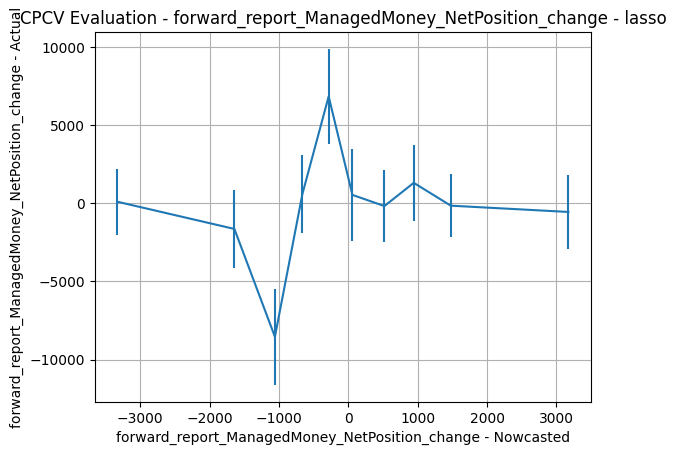

ridge: score=0.0316, params={'model': 'ridge', 'alpha': 906.6118860721004}
{'alpha': 906.6118860721004}


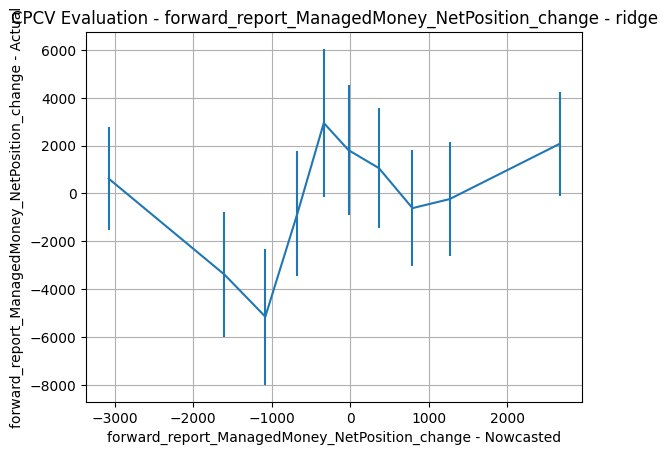

rf: score=0.1107, params={'model': 'rf', 'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 6, 'max_features': 'log2'}
{'n_estimators': 1000, 'max_depth': 3, 'min_samples_leaf': 6, 'max_features': 'log2'}


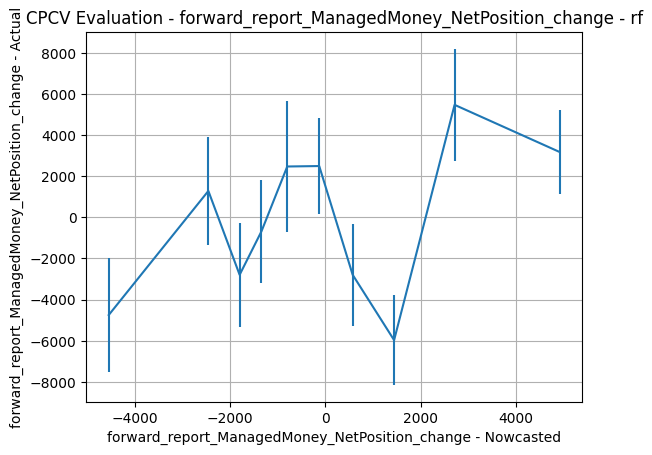

hgbm: score=0.1100, params={'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 8, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}
{'learning_rate': 0.0011976520841200263, 'max_depth': 8, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}


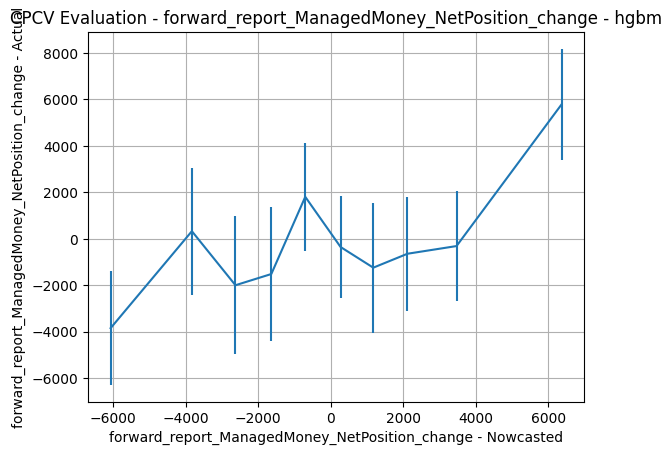

ols: score=0.0450, params={'model': 'ols'}
{}


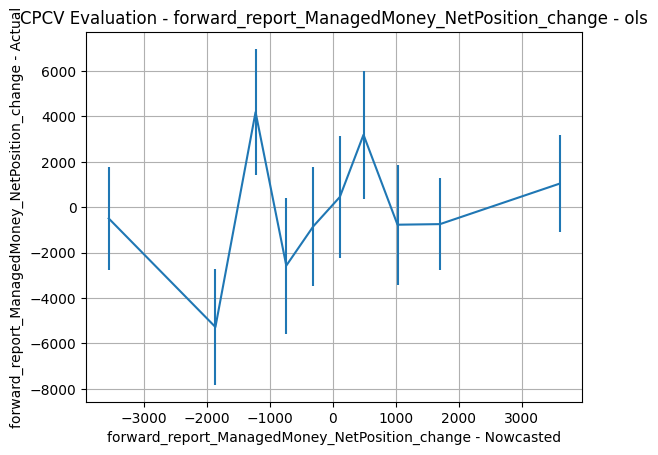

enet: score=-0.0323, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


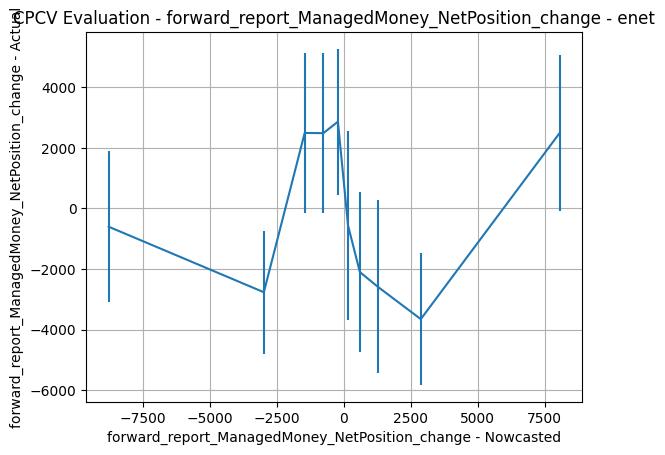

extra: score=0.0858, params={'model': 'extra', 'n_estimators': 1200, 'max_depth': 4, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
{'n_estimators': 1200, 'max_depth': 4, 'min_samples_leaf': 3, 'max_features': 'sqrt'}


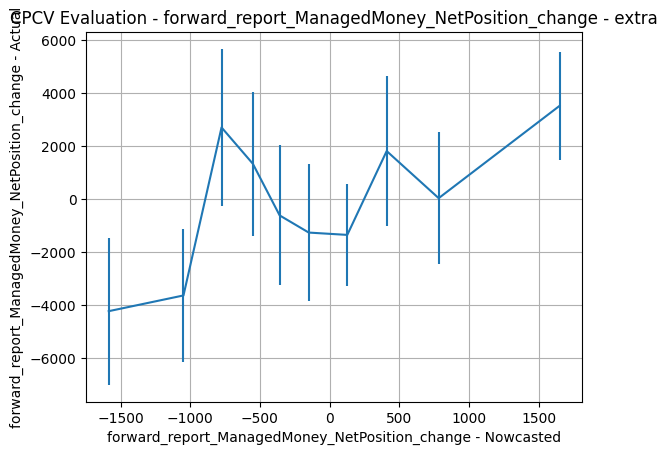

forward_report_ManagedMoney_LongPosition_change
lasso: score=-0.0441, params={'model': 'lasso', 'alpha': 5.9161481749897575}
{'alpha': 5.9161481749897575}


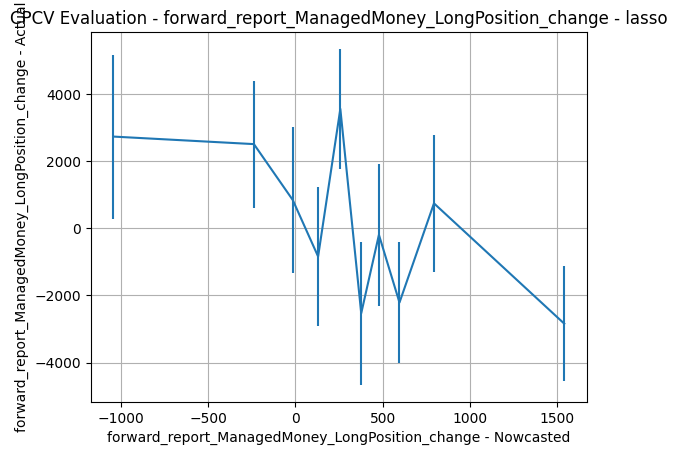

ridge: score=-0.0527, params={'model': 'ridge', 'alpha': 435.25613210920903}
{'alpha': 435.25613210920903}


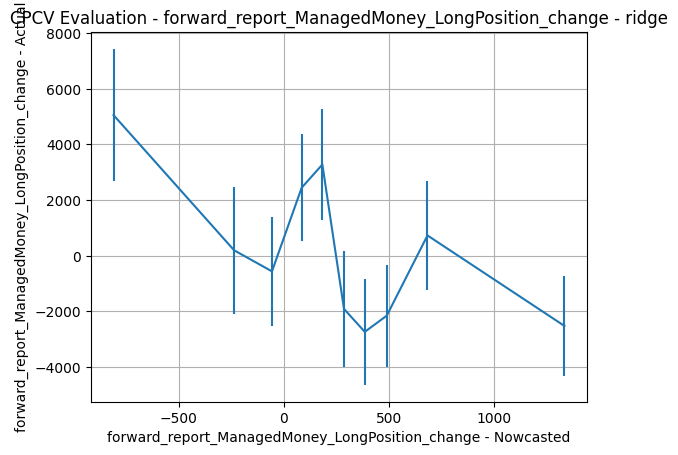

rf: score=0.0143, params={'model': 'rf', 'n_estimators': 800, 'max_depth': 23, 'min_samples_leaf': 4, 'max_features': 'log2'}
{'n_estimators': 800, 'max_depth': 23, 'min_samples_leaf': 4, 'max_features': 'log2'}


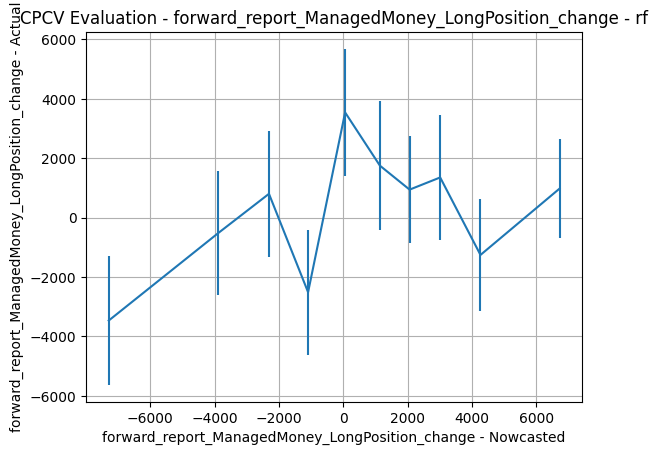

hgbm: score=0.0211, params={'model': 'hgbm', 'learning_rate': 0.02256731183200015, 'max_depth': 9, 'max_iter': 400, 'l2_regularization': 0.743577475755889, 'max_leaf_nodes': 48}
{'learning_rate': 0.02256731183200015, 'max_depth': 9, 'max_iter': 400, 'l2_regularization': 0.743577475755889, 'max_leaf_nodes': 48}


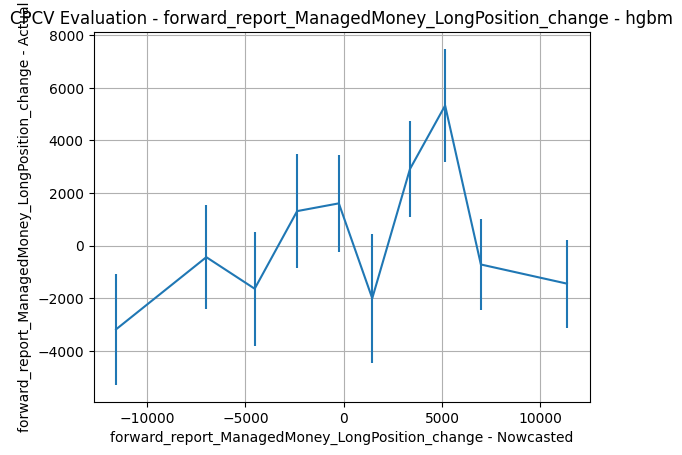

ols: score=-0.0438, params={'model': 'ols'}
{}


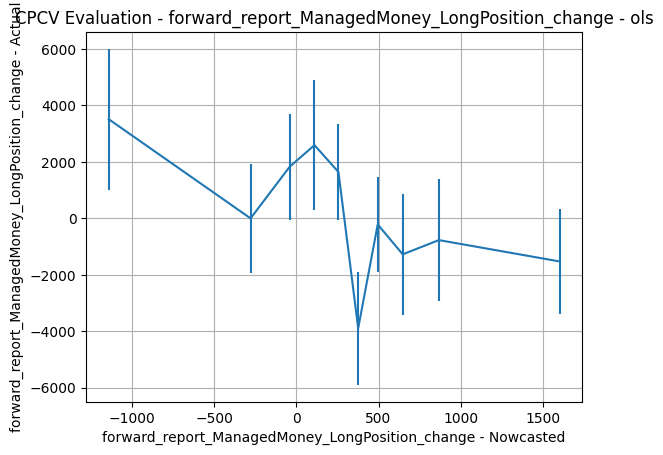

enet: score=-0.0592, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


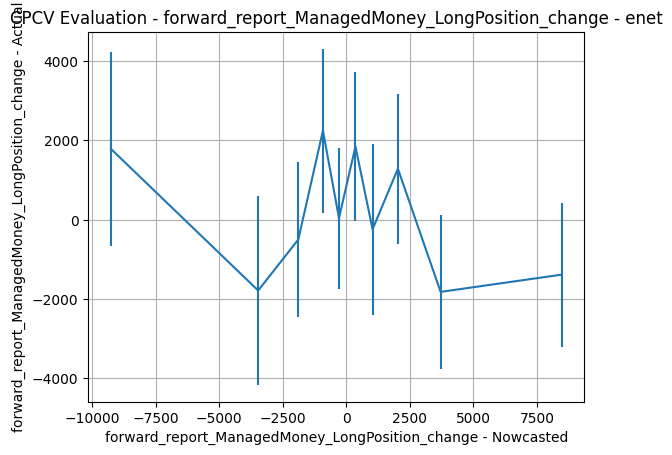

extra: score=-0.0173, params={'model': 'extra', 'n_estimators': 1200, 'max_depth': 28, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
{'n_estimators': 1200, 'max_depth': 28, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


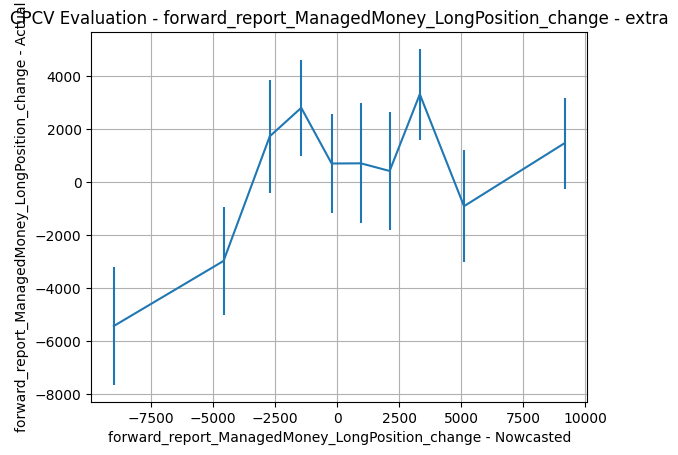

forward_report_ManagedMoney_ShortPosition_change
lasso: score=0.0199, params={'model': 'lasso', 'alpha': 9.409741456225913}
{'alpha': 9.409741456225913}


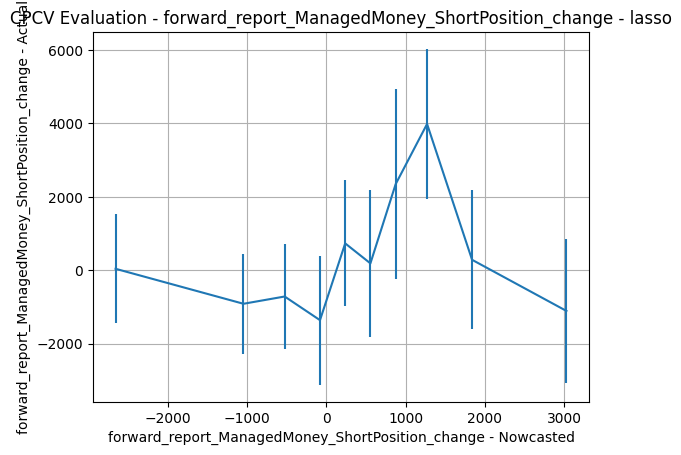

ridge: score=0.0013, params={'model': 'ridge', 'alpha': 906.6118860721004}
{'alpha': 906.6118860721004}


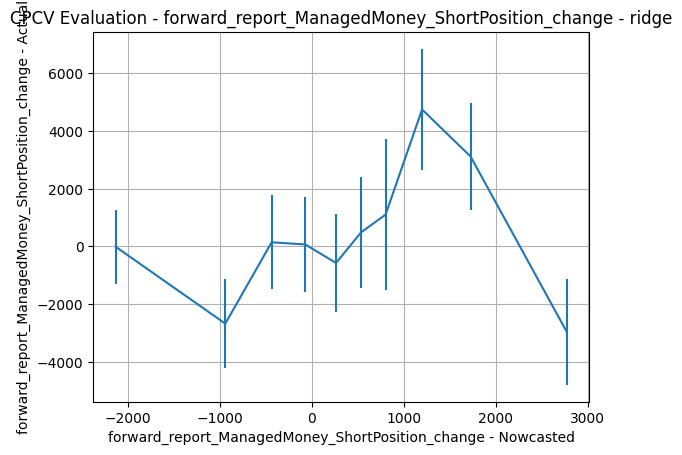

rf: score=0.1176, params={'model': 'rf', 'n_estimators': 800, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'log2'}
{'n_estimators': 800, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'log2'}


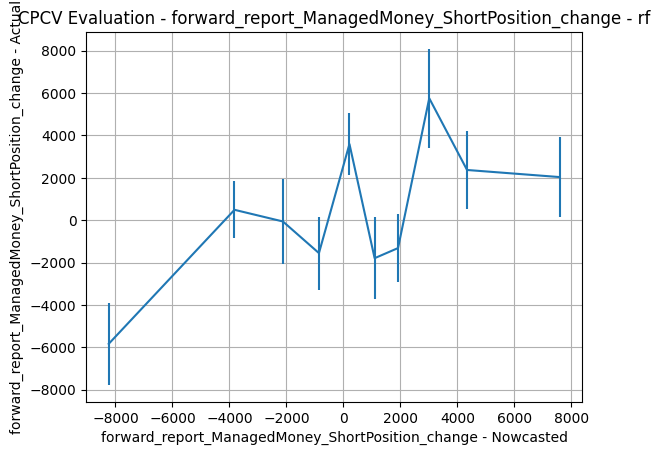

hgbm: score=0.0785, params={'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 4, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}
{'learning_rate': 0.20317617225236814, 'max_depth': 4, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}


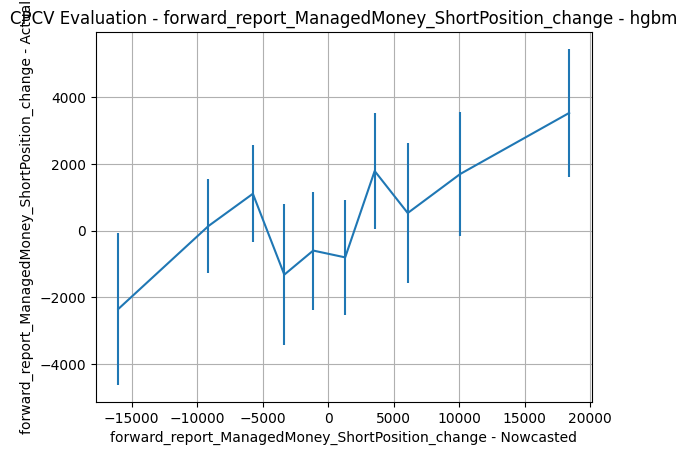

ols: score=0.0205, params={'model': 'ols'}
{}


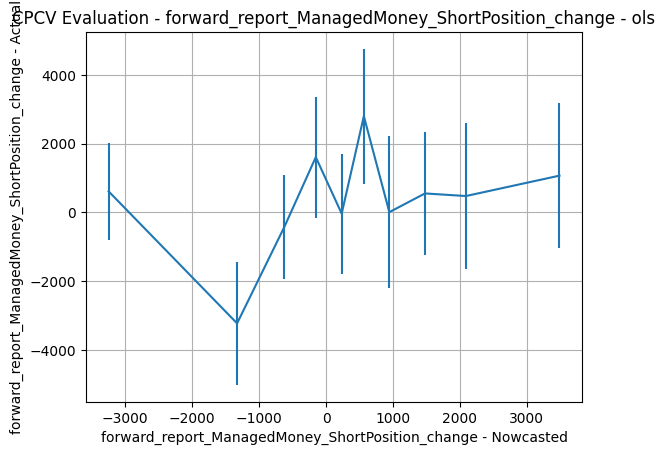

enet: score=-0.0346, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


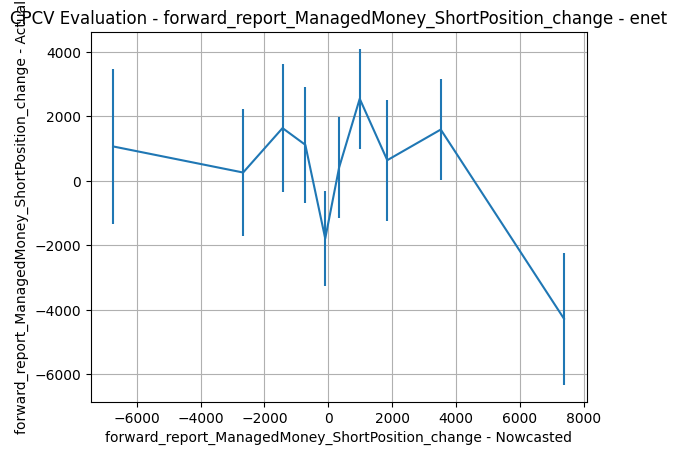

extra: score=0.1052, params={'model': 'extra', 'n_estimators': 1000, 'max_depth': 25, 'min_samples_leaf': 2, 'max_features': 'log2'}
{'n_estimators': 1000, 'max_depth': 25, 'min_samples_leaf': 2, 'max_features': 'log2'}


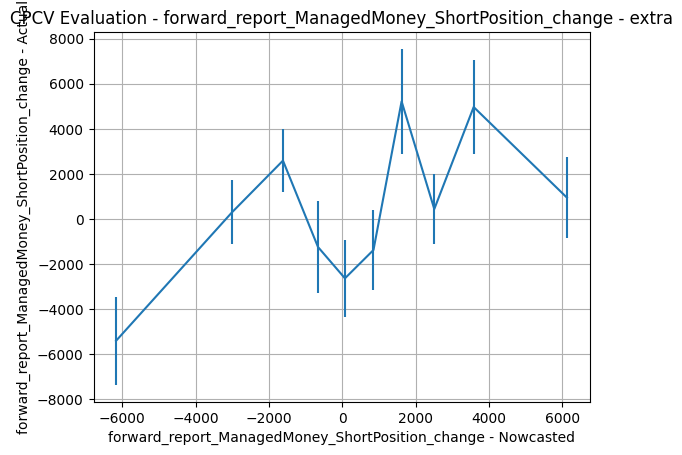

forward_ManagedMoney_NetPosition_to_openinterest_change
lasso: score=-0.0484, params={'model': 'lasso', 'alpha': 1.156732719914599}
{'alpha': 1.156732719914599}


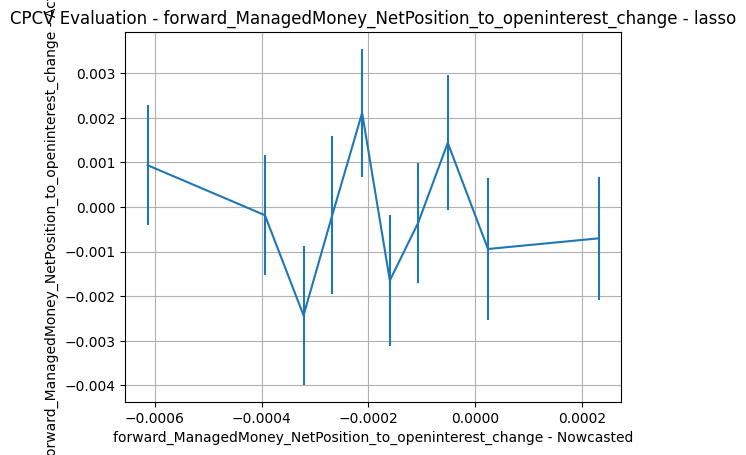

ridge: score=0.1590, params={'model': 'ridge', 'alpha': 906.6118860721004}
{'alpha': 906.6118860721004}


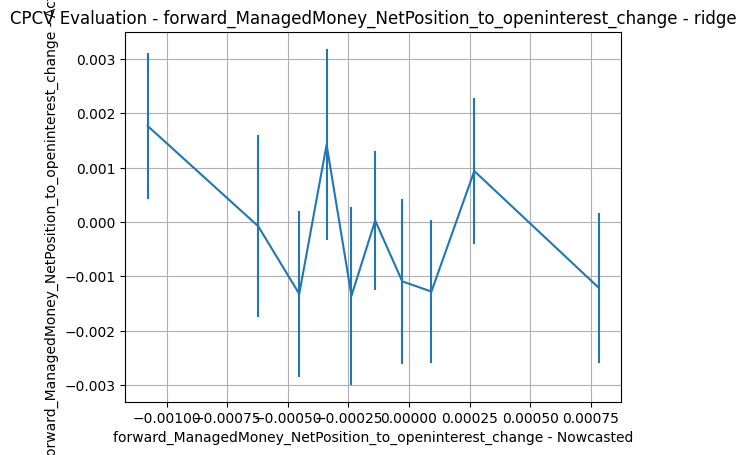

rf: score=0.2184, params={'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}
{'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}


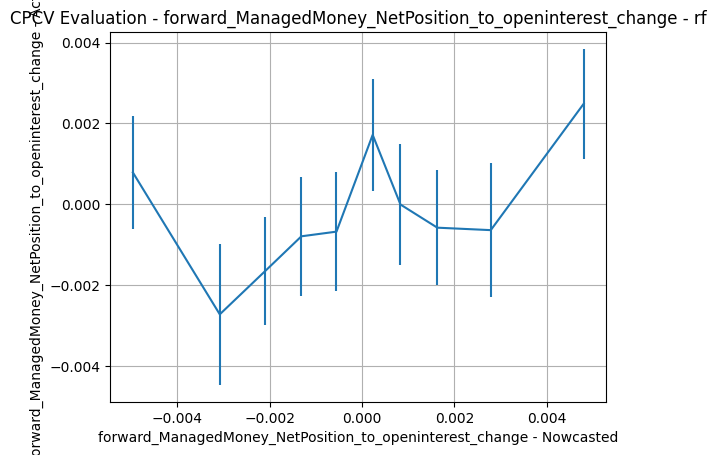

hgbm: score=0.1857, params={'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 11, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}
{'learning_rate': 0.20317617225236814, 'max_depth': 11, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}


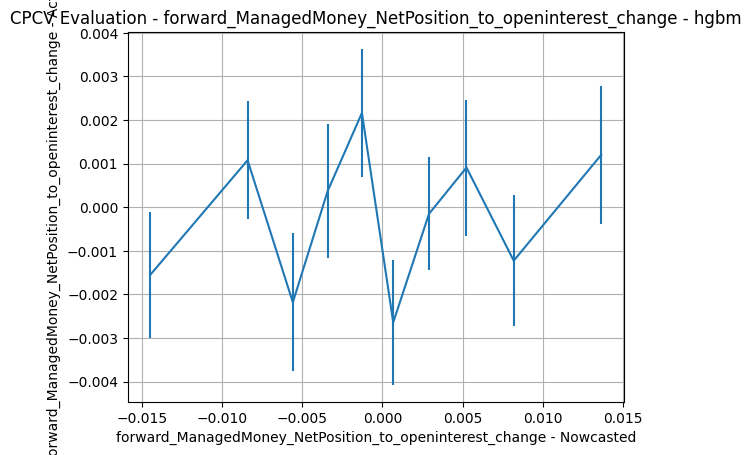

ols: score=0.1932, params={'model': 'ols'}
{}


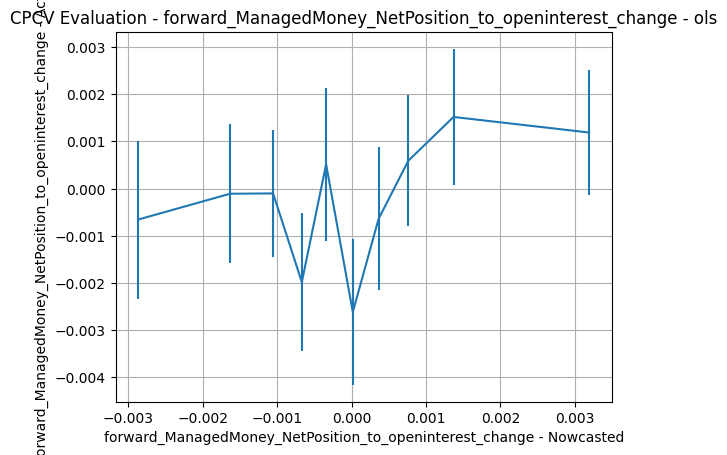

enet: score=-0.0468, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


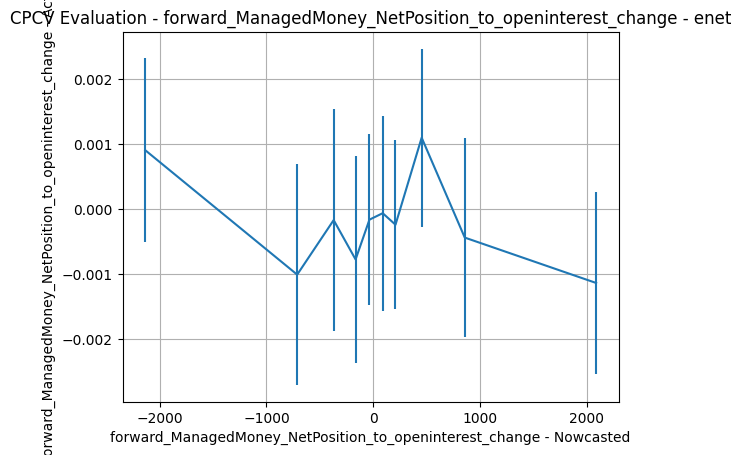

extra: score=0.2124, params={'model': 'extra', 'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
{'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


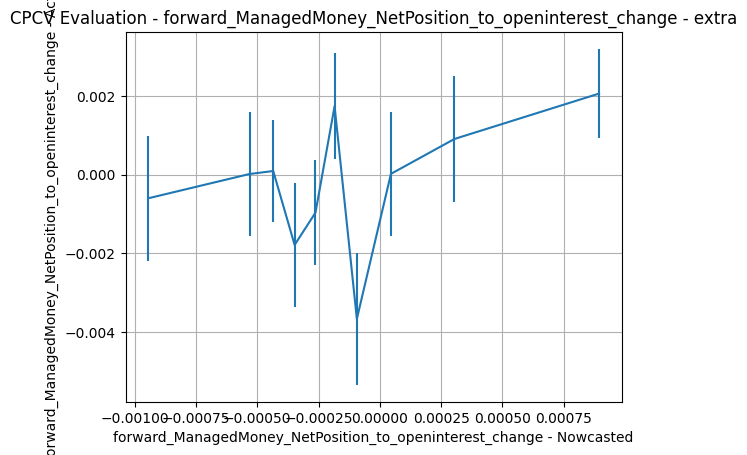

forward_ManagedMoney_LongPosition_to_openinterest_change
lasso: score=-0.0465, params={'model': 'lasso', 'alpha': 1.156732719914599}
{'alpha': 1.156732719914599}


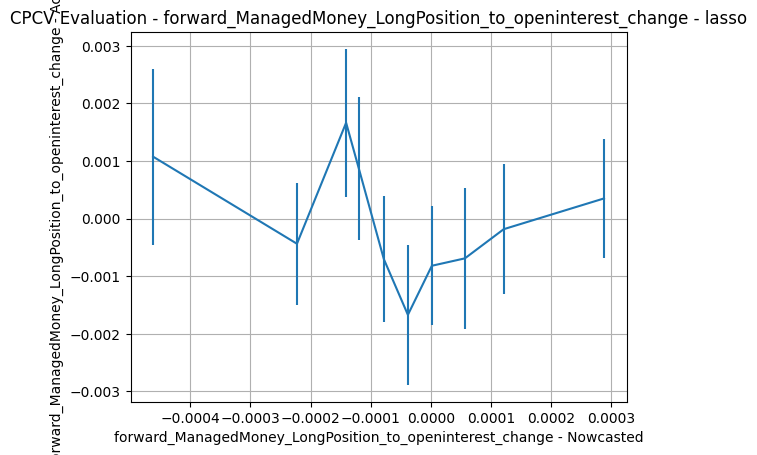

ridge: score=0.2089, params={'model': 'ridge', 'alpha': 906.6118860721004}
{'alpha': 906.6118860721004}


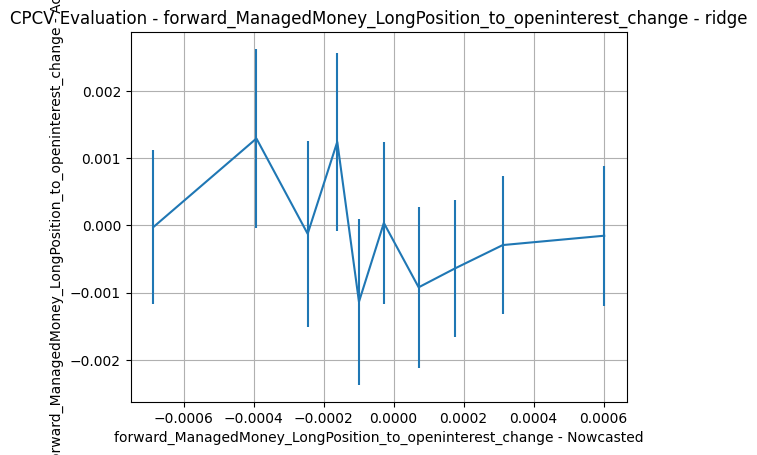

rf: score=0.2770, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 27, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
{'n_estimators': 200, 'max_depth': 27, 'min_samples_leaf': 4, 'max_features': 'sqrt'}


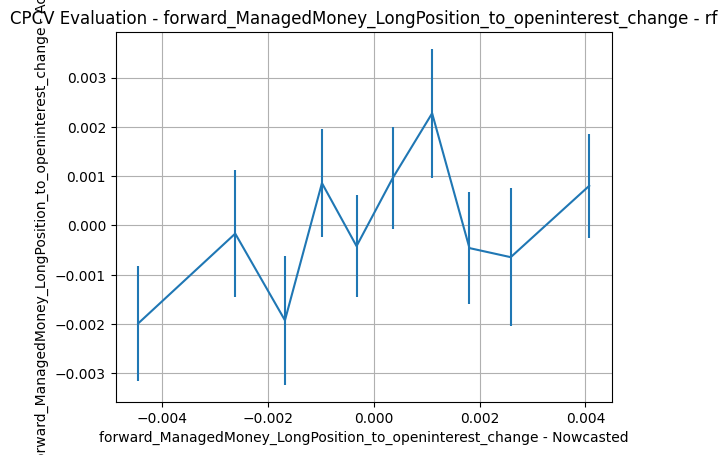

hgbm: score=0.1747, params={'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 13, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}
{'learning_rate': 0.20317617225236814, 'max_depth': 13, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}


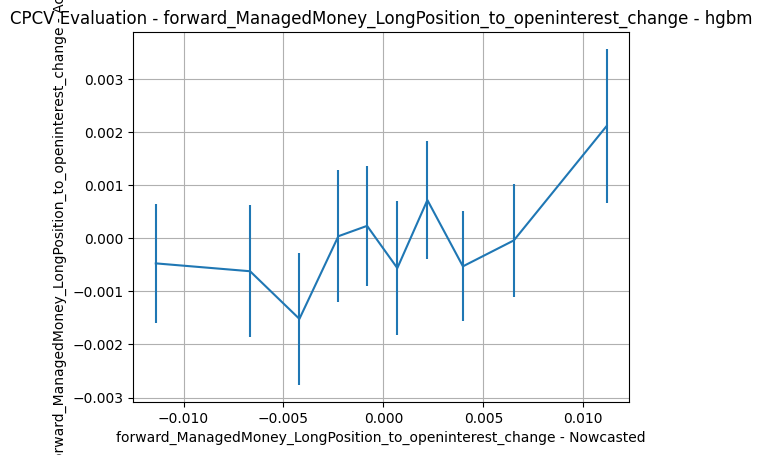

ols: score=0.2148, params={'model': 'ols'}
{}


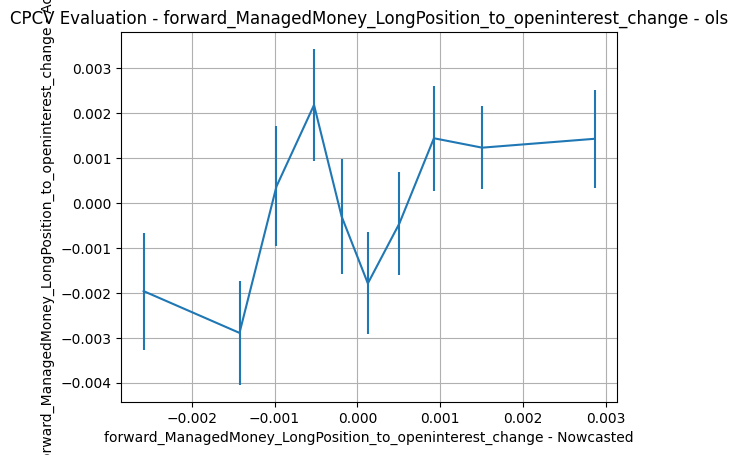

enet: score=-0.0448, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


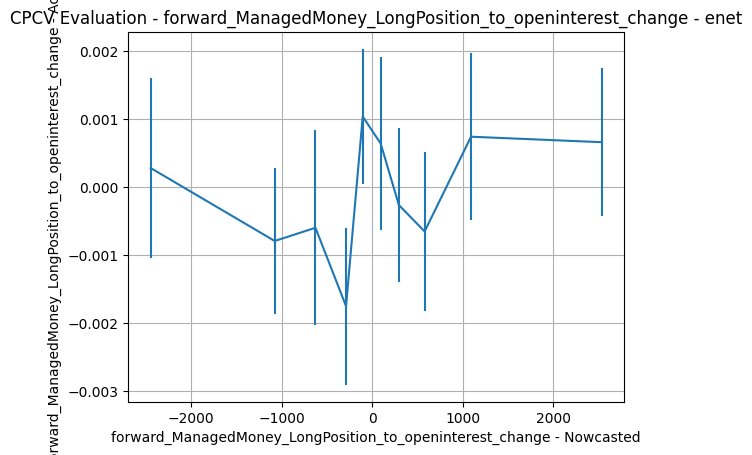

extra: score=0.2641, params={'model': 'extra', 'n_estimators': 200, 'max_depth': 28, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
{'n_estimators': 200, 'max_depth': 28, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


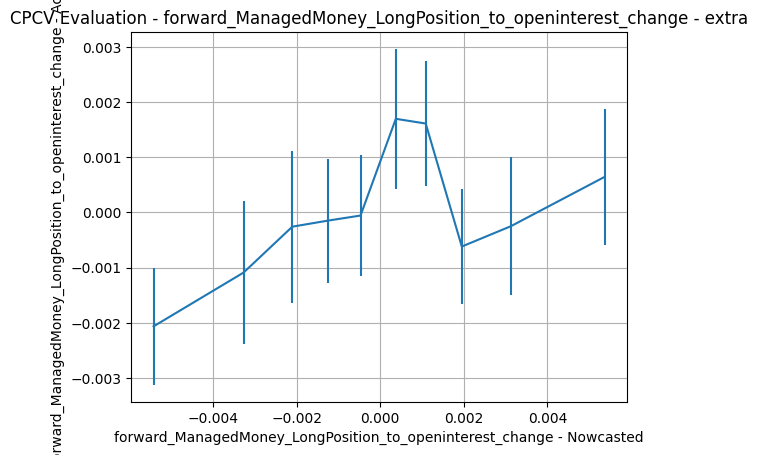

forward_ManagedMoney_ShortPosition_to_openinterest_change
lasso: score=-0.0301, params={'model': 'lasso', 'alpha': 1.156732719914599}
{'alpha': 1.156732719914599}


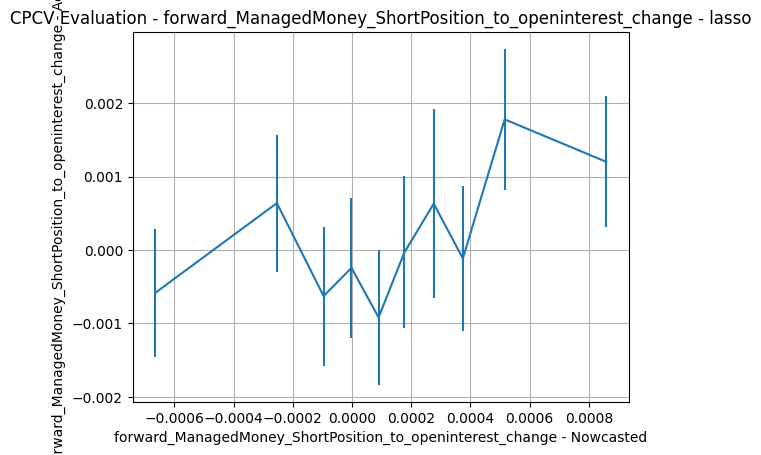

ridge: score=0.0133, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
{'alpha': 4.473429410462694e-05}


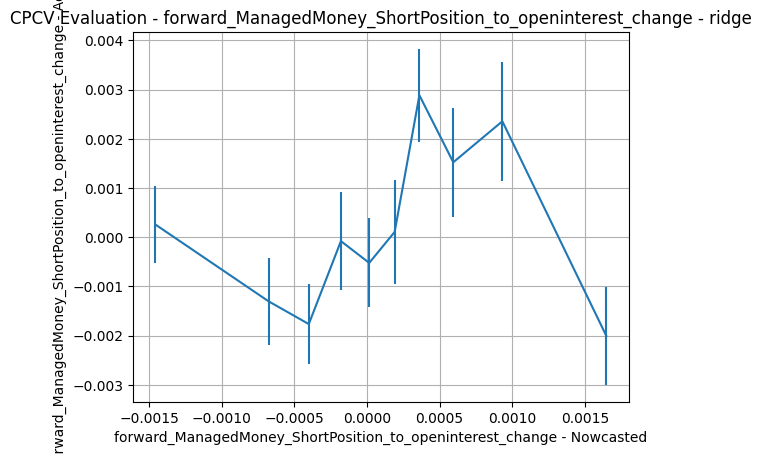

rf: score=0.1162, params={'model': 'rf', 'n_estimators': 800, 'max_depth': 17, 'min_samples_leaf': 2, 'max_features': 'sqrt'}
{'n_estimators': 800, 'max_depth': 17, 'min_samples_leaf': 2, 'max_features': 'sqrt'}


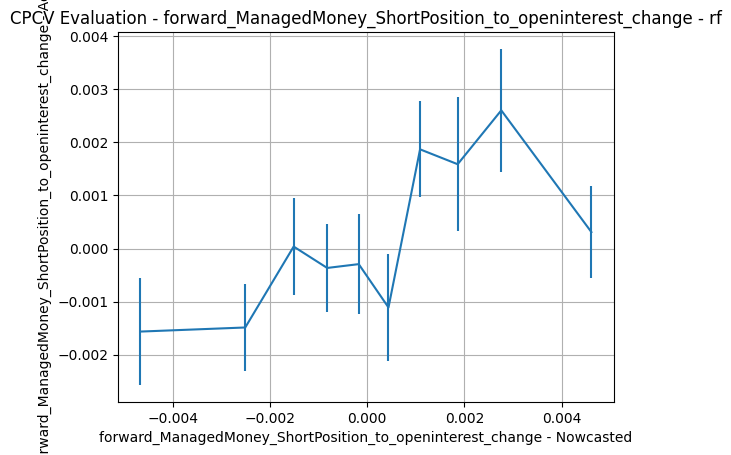

hgbm: score=0.0706, params={'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 15, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}
{'learning_rate': 0.20317617225236814, 'max_depth': 15, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}


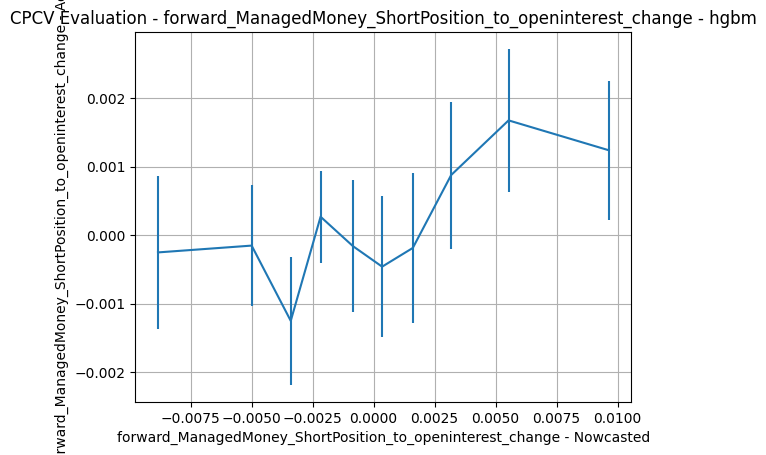

ols: score=0.0133, params={'model': 'ols'}
{}


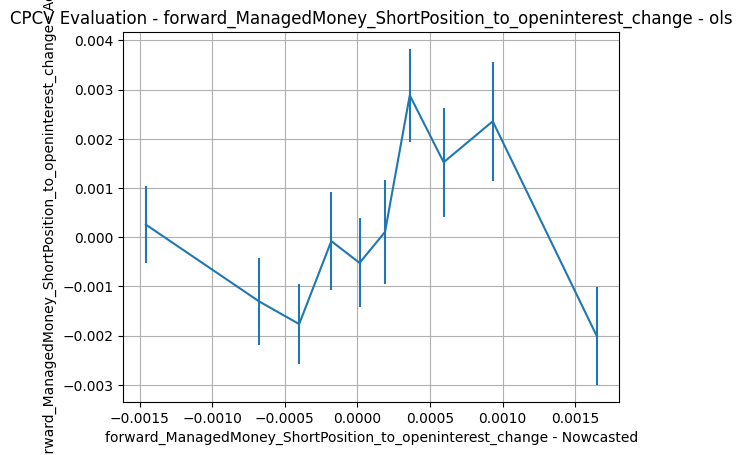

enet: score=-0.0225, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


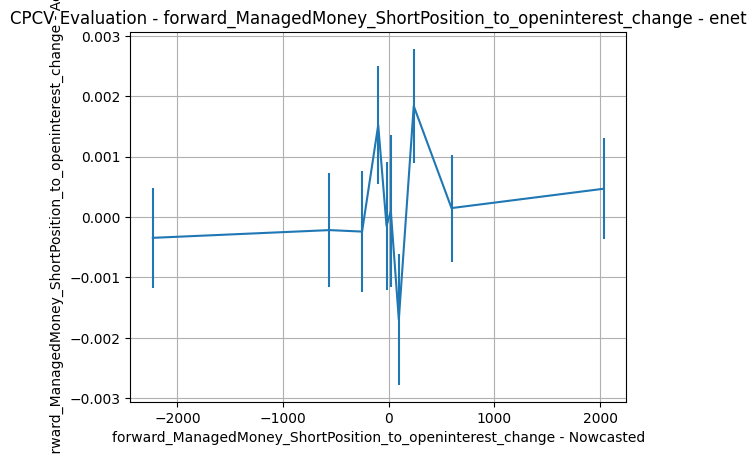

extra: score=0.0839, params={'model': 'extra', 'n_estimators': 800, 'max_depth': 24, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
{'n_estimators': 800, 'max_depth': 24, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


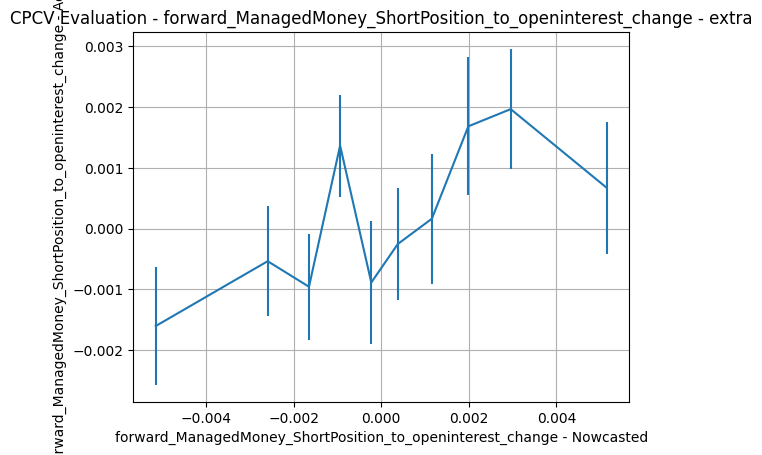

In [36]:
response_performance_map = {}
for response_name , best_model in responses_best_model.items():
    print(response_name)
    best_per_model = responses_best_per_model[response_name]
    response_performance_trail = {}
    for model_name, info in best_per_model.items():
        print(f"{model_name}: score={info['score']:.4f}, params={info['params']}")
        params = copy.deepcopy(info['params'])
        del params['model']
        print(params)
        # estimator = estimators_[model_name.lower()](**params) 

        if model_name == "enet": 
            estimator = SGDRegressor(**params)
        elif model_name == "lasso": 
            estimator = Lasso(**params)
        elif model_name == "ols": 
            estimator = LinearRegression()
        elif model_name == "ridge": 
            estimator = Ridge(**params)
        elif  model_name == "rf": 
            estimator = RandomForestRegressor(**params)
        elif model_name == "extra":
            estimator = ExtraTreesRegressor(**params)
        elif model_name == "hgbm":
            estimator = HistGradientBoostingRegressor(**params)
        

        Xy = dataset[['tradeDate']+feature_names+[response_name]].dropna()
        Xy.reset_index(drop=True, inplace= True)
        yhat = cpcv_predict( estimator ,
                             Xy[feature_names],
                             Xy[response_name],
                             cv=cv,
                                method = 'predict',
                                n_jobs=10)
        response_performance_trail[model_name] = np.corrcoef(yhat,  Xy[response_name])[0,1]
        _=plot_bin_summary_of_xy(
                    x = yhat,
                    y = Xy[response_name],
                    k= 10 )
        plt.xlabel(f'{response_name} - Nowcasted')
        plt.ylabel(f'{response_name} - Actual')
        plt.grid()
        plt.title(f'CPCV Evaluation - {response_name} - {model_name}')
        plt.show()
        plt.close()
    response_performance_map[response_name] = response_performance_trail
        
        

In [37]:
pd.DataFrame(response_performance_map).T

,lasso,ridge,rf,hgbm,ols,enet,extra
forward_report_ManagedMoney_NetPosition_change,-0.002628,0.015420,0.072406,0.082621,0.003581,0.014770,0.050360
forward_report_ManagedMoney_LongPosition_change,-0.089517,-0.076532,0.048257,0.046733,-0.085700,-0.022518,0.071519
forward_report_ManagedMoney_ShortPosition_change,0.000686,0.006962,0.116726,0.089314,0.021245,-0.041791,0.103980
forward_ManagedMoney_NetPosition_to_openinterest_change,-0.035847,-0.051633,0.058392,0.029579,0.052025,-0.003922,0.084770
forward_ManagedMoney_LongPosition_to_openinterest_change,-0.035723,-0.040273,0.048535,0.061485,0.097593,0.033065,0.057832
forward_ManagedMoney_ShortPosition_to_openinterest_change,0.015674,0.013338,0.118823,0.070626,0.013329,0.019795,0.081761


In [38]:
final_selected_model_per_response = dict(pd.DataFrame(response_performance_map).T.idxmax(axis=1))

In [39]:
final_selected_model_and_parameters_per_response = {}
for response_name , best_model_params in responses_best_per_model.items():
    print(response_name)
    best_model_name = final_selected_model_per_response[response_name]
    best_model_params = copy.deepcopy(best_model_params[best_model_name]['params'])
    del best_model_params['model']
    print(best_model_params)
    final_selected_model_and_parameters_per_response[response_name] = {
'model_name' : best_model_name, 
    'params': best_model_params
        
    }
    

forward_report_ManagedMoney_NetPosition_change
{'learning_rate': 0.0011976520841200263, 'max_depth': 8, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}
forward_report_ManagedMoney_LongPosition_change
{'n_estimators': 1200, 'max_depth': 28, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
forward_report_ManagedMoney_ShortPosition_change
{'n_estimators': 800, 'max_depth': 10, 'min_samples_leaf': 2, 'max_features': 'log2'}
forward_ManagedMoney_NetPosition_to_openinterest_change
{'n_estimators': 200, 'max_depth': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
forward_ManagedMoney_LongPosition_to_openinterest_change
{}
forward_ManagedMoney_ShortPosition_to_openinterest_change
{'n_estimators': 800, 'max_depth': 17, 'min_samples_leaf': 2, 'max_features': 'sqrt'}


In [40]:
final_selected_model_and_parameters_per_response

{'forward_report_ManagedMoney_NetPosition_change': {'model_name': 'hgbm',
  'params': {'learning_rate': 0.0011976520841200263,
   'max_depth': 8,
   'max_iter': 800,
   'l2_regularization': 0.9664981016783335,
   'max_leaf_nodes': 21}},
 'forward_report_ManagedMoney_LongPosition_change': {'model_name': 'extra',
  'params': {'n_estimators': 1200,
   'max_depth': 28,
   'min_samples_leaf': 1,
   'max_features': 'sqrt'}},
 'forward_report_ManagedMoney_ShortPosition_change': {'model_name': 'rf',
  'params': {'n_estimators': 800,
   'max_depth': 10,
   'min_samples_leaf': 2,
   'max_features': 'log2'}},
 'forward_ManagedMoney_NetPosition_to_openinterest_change': {'model_name': 'extra',
  'params': {'n_estimators': 200,
   'max_depth': 3,
   'min_samples_leaf': 1,
   'max_features': 'sqrt'}},
 'forward_ManagedMoney_LongPosition_to_openinterest_change': {'model_name': 'ols',
  'params': {}},
 'forward_ManagedMoney_ShortPosition_to_openinterest_change': {'model_name': 'rf',
  'params': {'n_est

In [41]:
import json
with open("wti_cot_mm_forecast_selected_model_by_response.json", "w") as f:
    json.dump(final_selected_model_and_parameters_per_response, f)